In [1]:
library(Seurat)
library(tidyverse)
library(patchwork)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
obj_neuron = qs::qread('obj_cb_neuron')
obj_neuron

An object of class Seurat 
29114 features across 104287 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [3]:
obj = obj_neuron

In [4]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



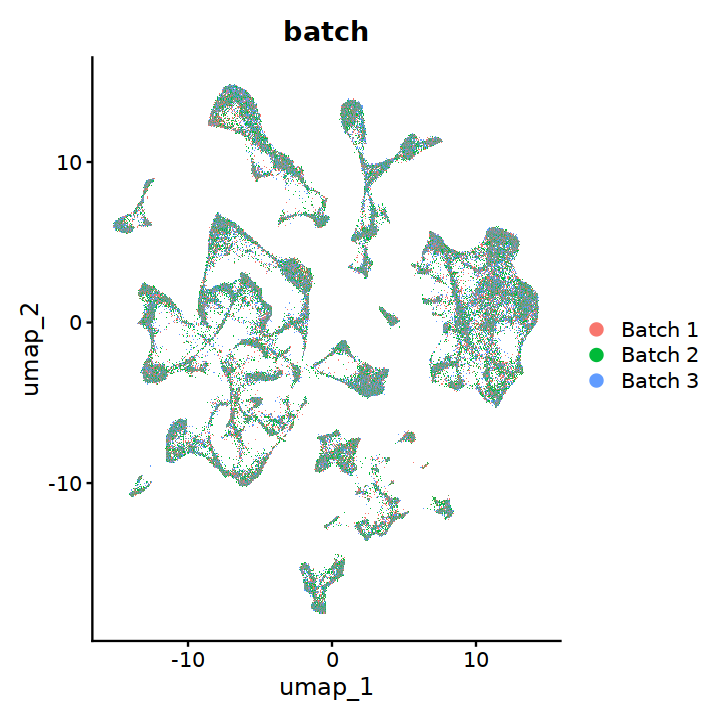

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



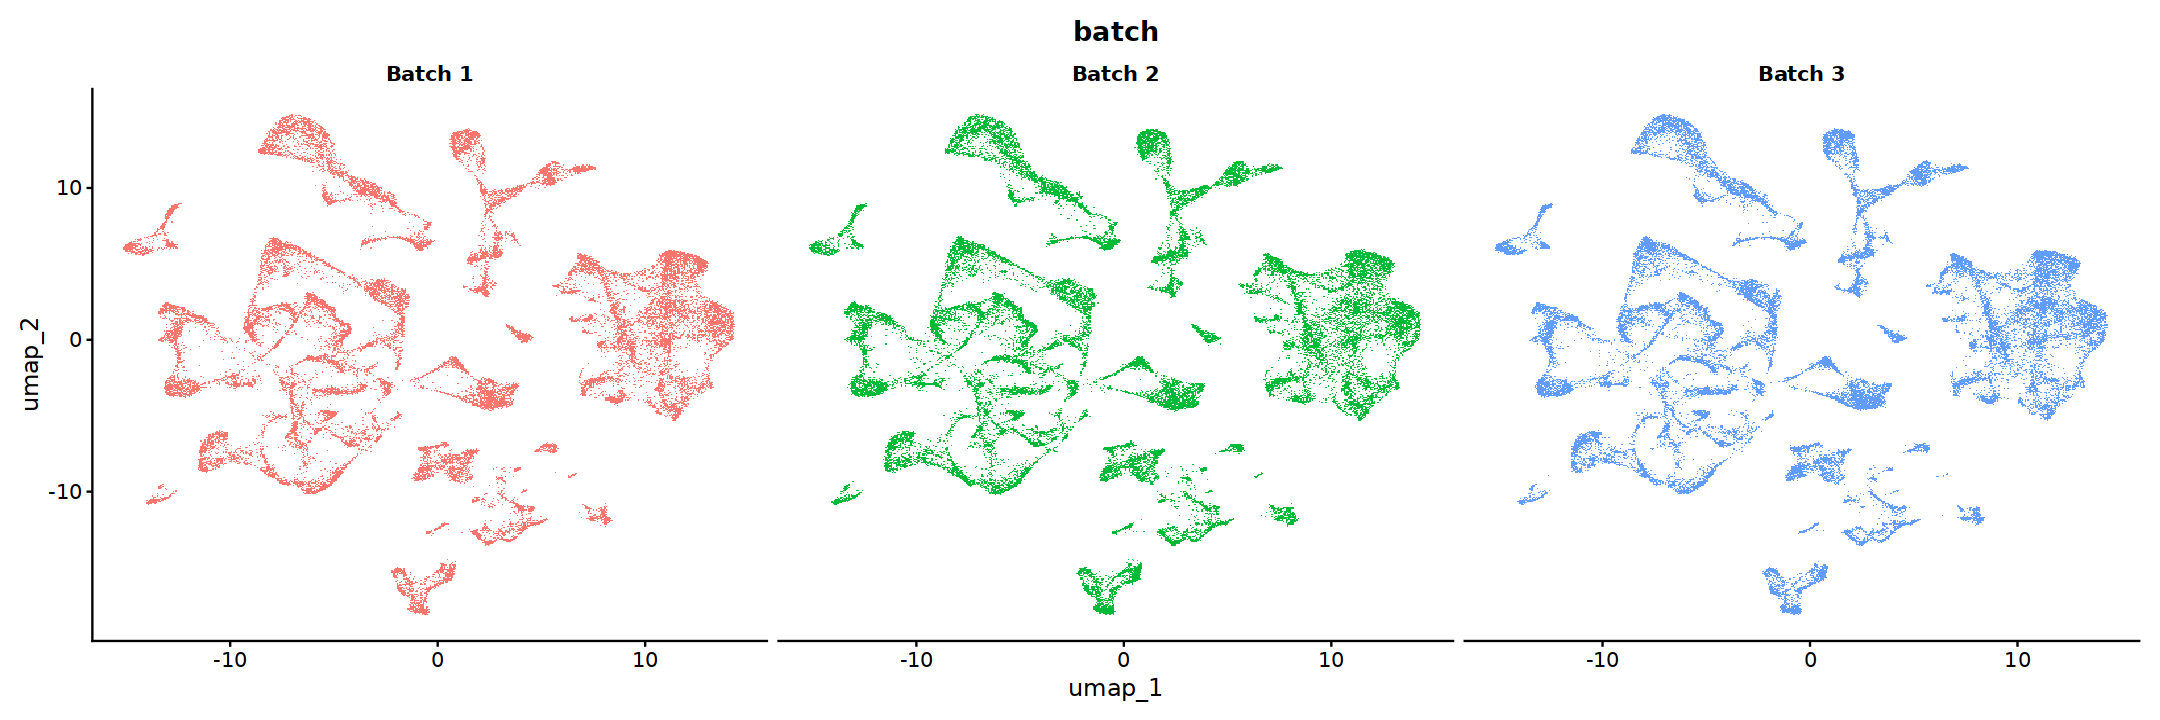

In [6]:
options(repr.plot.width=18, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', split.by='batch', label=F, repel = T) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



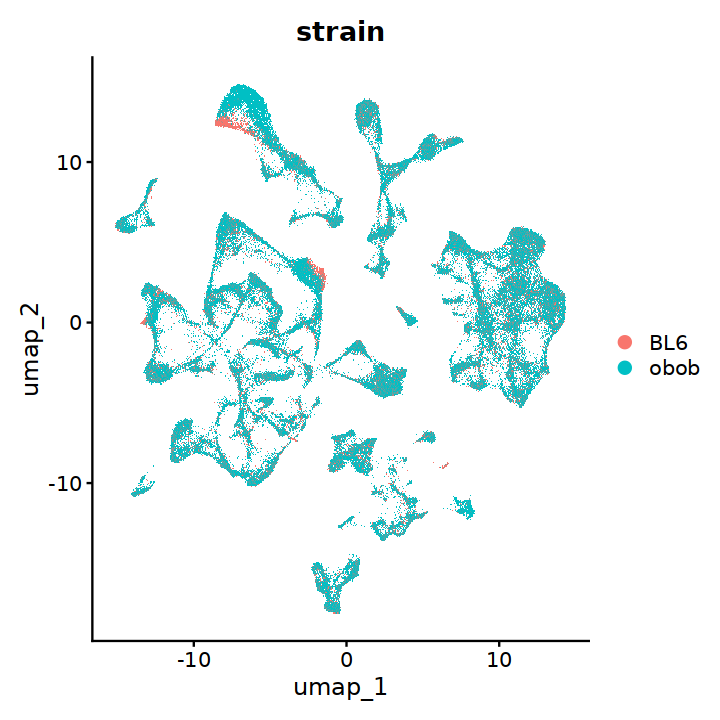

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



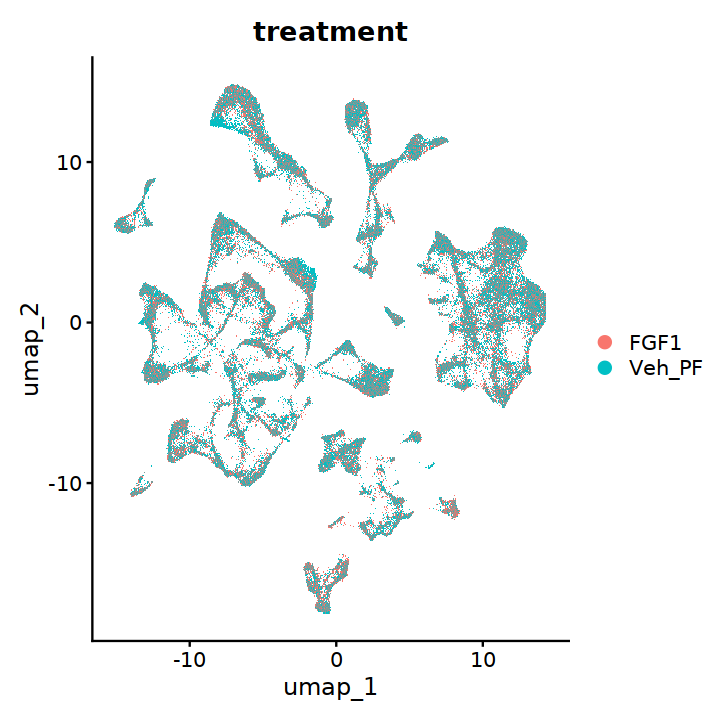

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



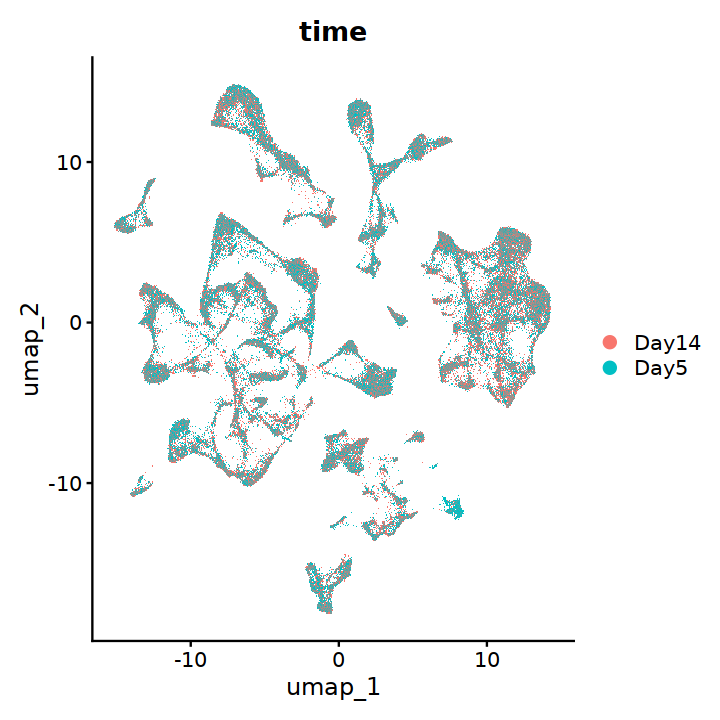

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='time', label=F, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



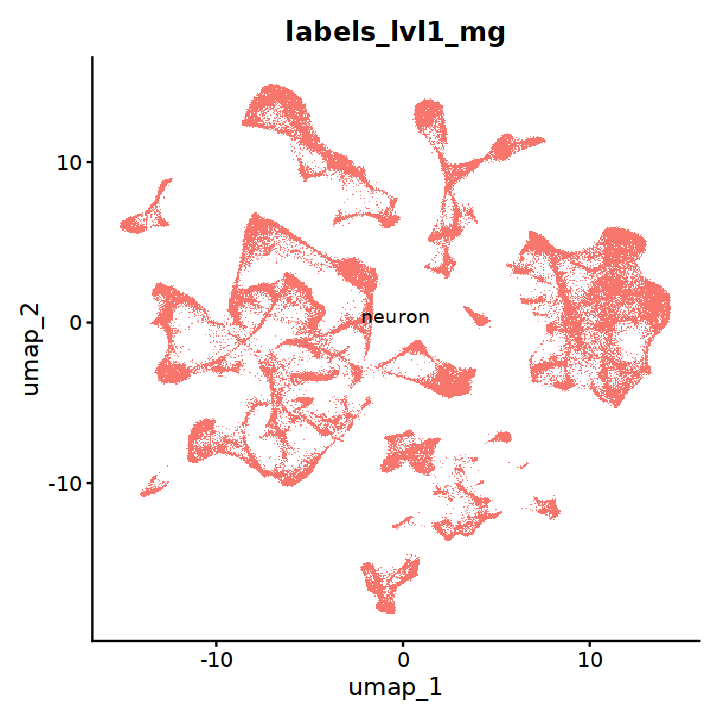

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='labels_lvl1_mg', label=T) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



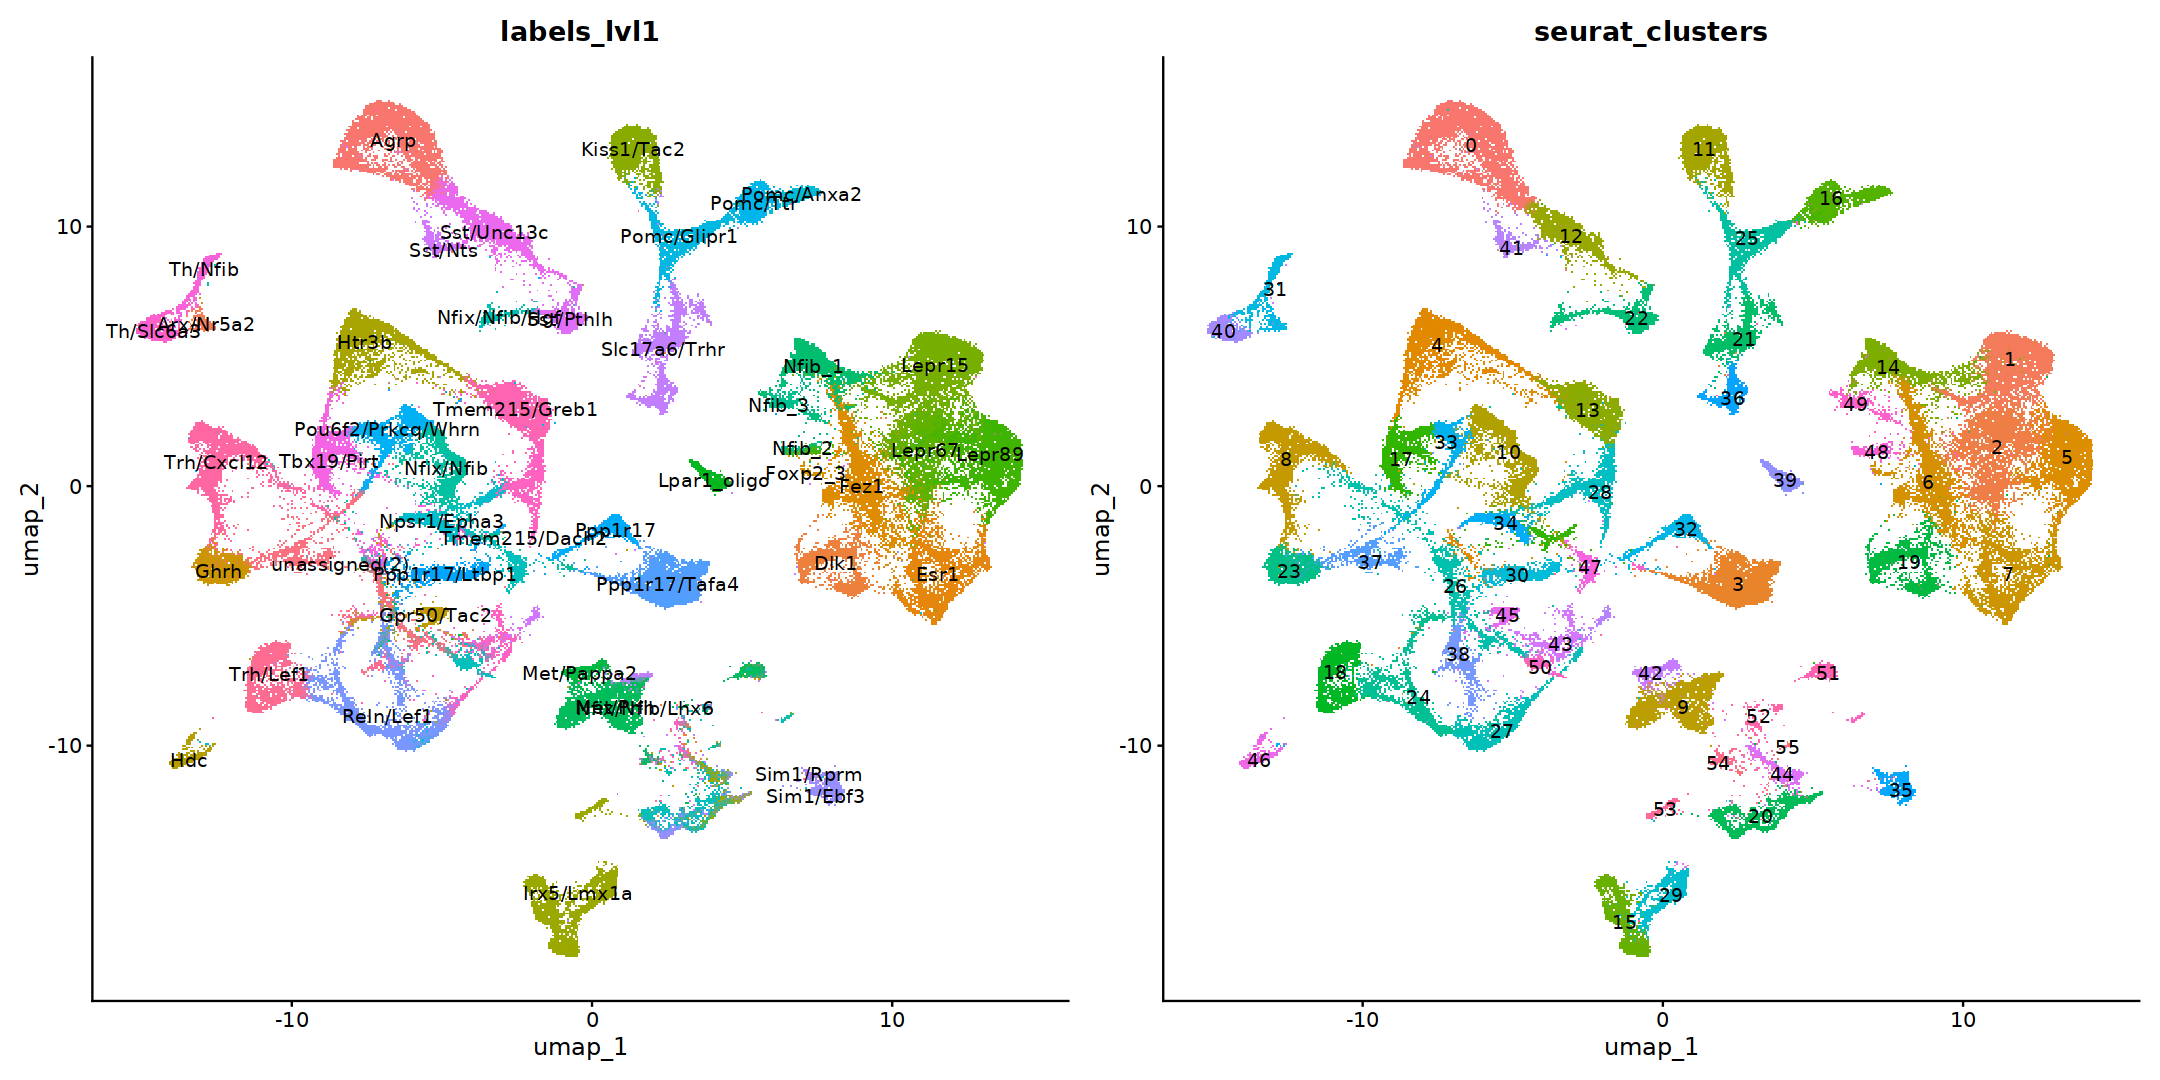

In [11]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [12]:
create_freq_df_per_cluster <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = labels, value = freq, fill = 0)
    freq_df

}

create_freq_df_per_label <- function(obj, label_col = 'labels_lvl1') {
    meta = obj %>% `[[`
    meta$labels = meta[[label_col]]
    freq_df <- meta %>%
      group_by(seurat_clusters, labels) %>%
      count() %>%
      group_by(seurat_clusters) %>%
      mutate(freq = n / sum(n)) %>%
      ungroup() %>%
      select(-n) %>%
      spread(key = seurat_clusters, value = freq, fill = 0)
    freq_df

}



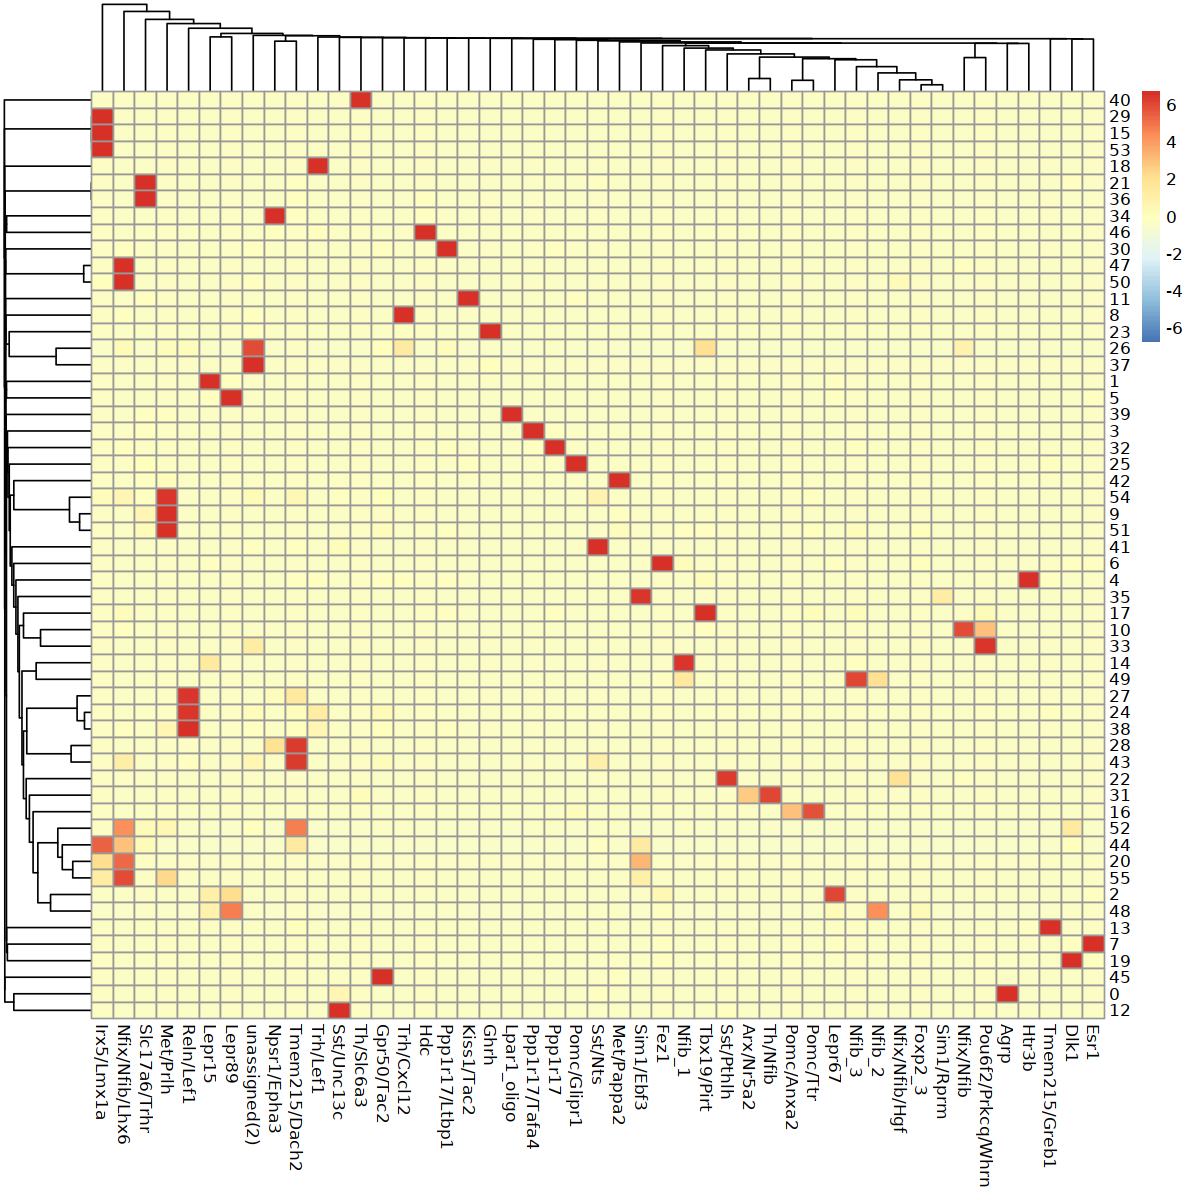

In [13]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


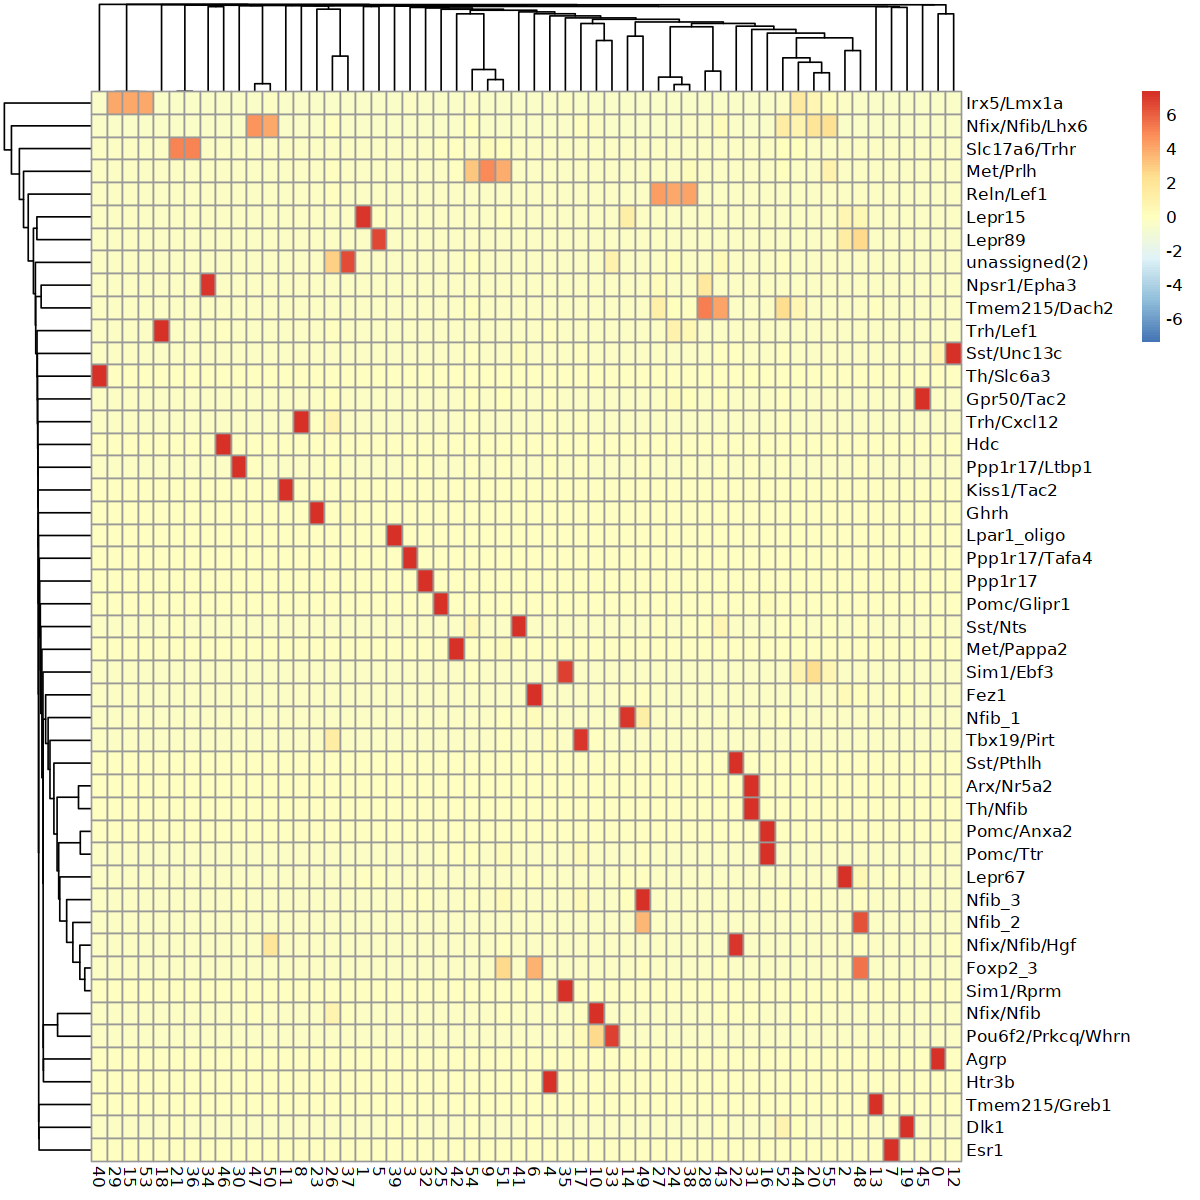

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
freq_df = create_freq_df_per_label(obj, label_col='labels_lvl1')


library(pheatmap)
# Prepare the data (remove the first column that contains seurat_clusters names)
data_for_heatmap <- freq_df[,-1]

# Hierarchical clustering
row_dist <- dist(data_for_heatmap, method = "euclidean")
row_clust <- hclust(row_dist, method = "complete")

col_dist <- dist(t(data_for_heatmap), method = "euclidean")
col_clust <- hclust(col_dist, method = "complete")

# Plotting heatmap with dendrograms
pheatmap(data_for_heatmap, 
         cluster_rows = row_clust, 
         cluster_cols = col_clust,
         scale = "row",  # Scaling rows can be helpful for visualization
         show_rownames = TRUE,
         show_colnames = TRUE,
         labels_row = freq_df[,1] %>% pull) # Setting row labels


In [15]:
drop_these_cells = obj %>%
`[[` %>%
filter(!(seurat_clusters %in% c(51, 52, 53, 54, 55, 44, 20))) %>%
rownames


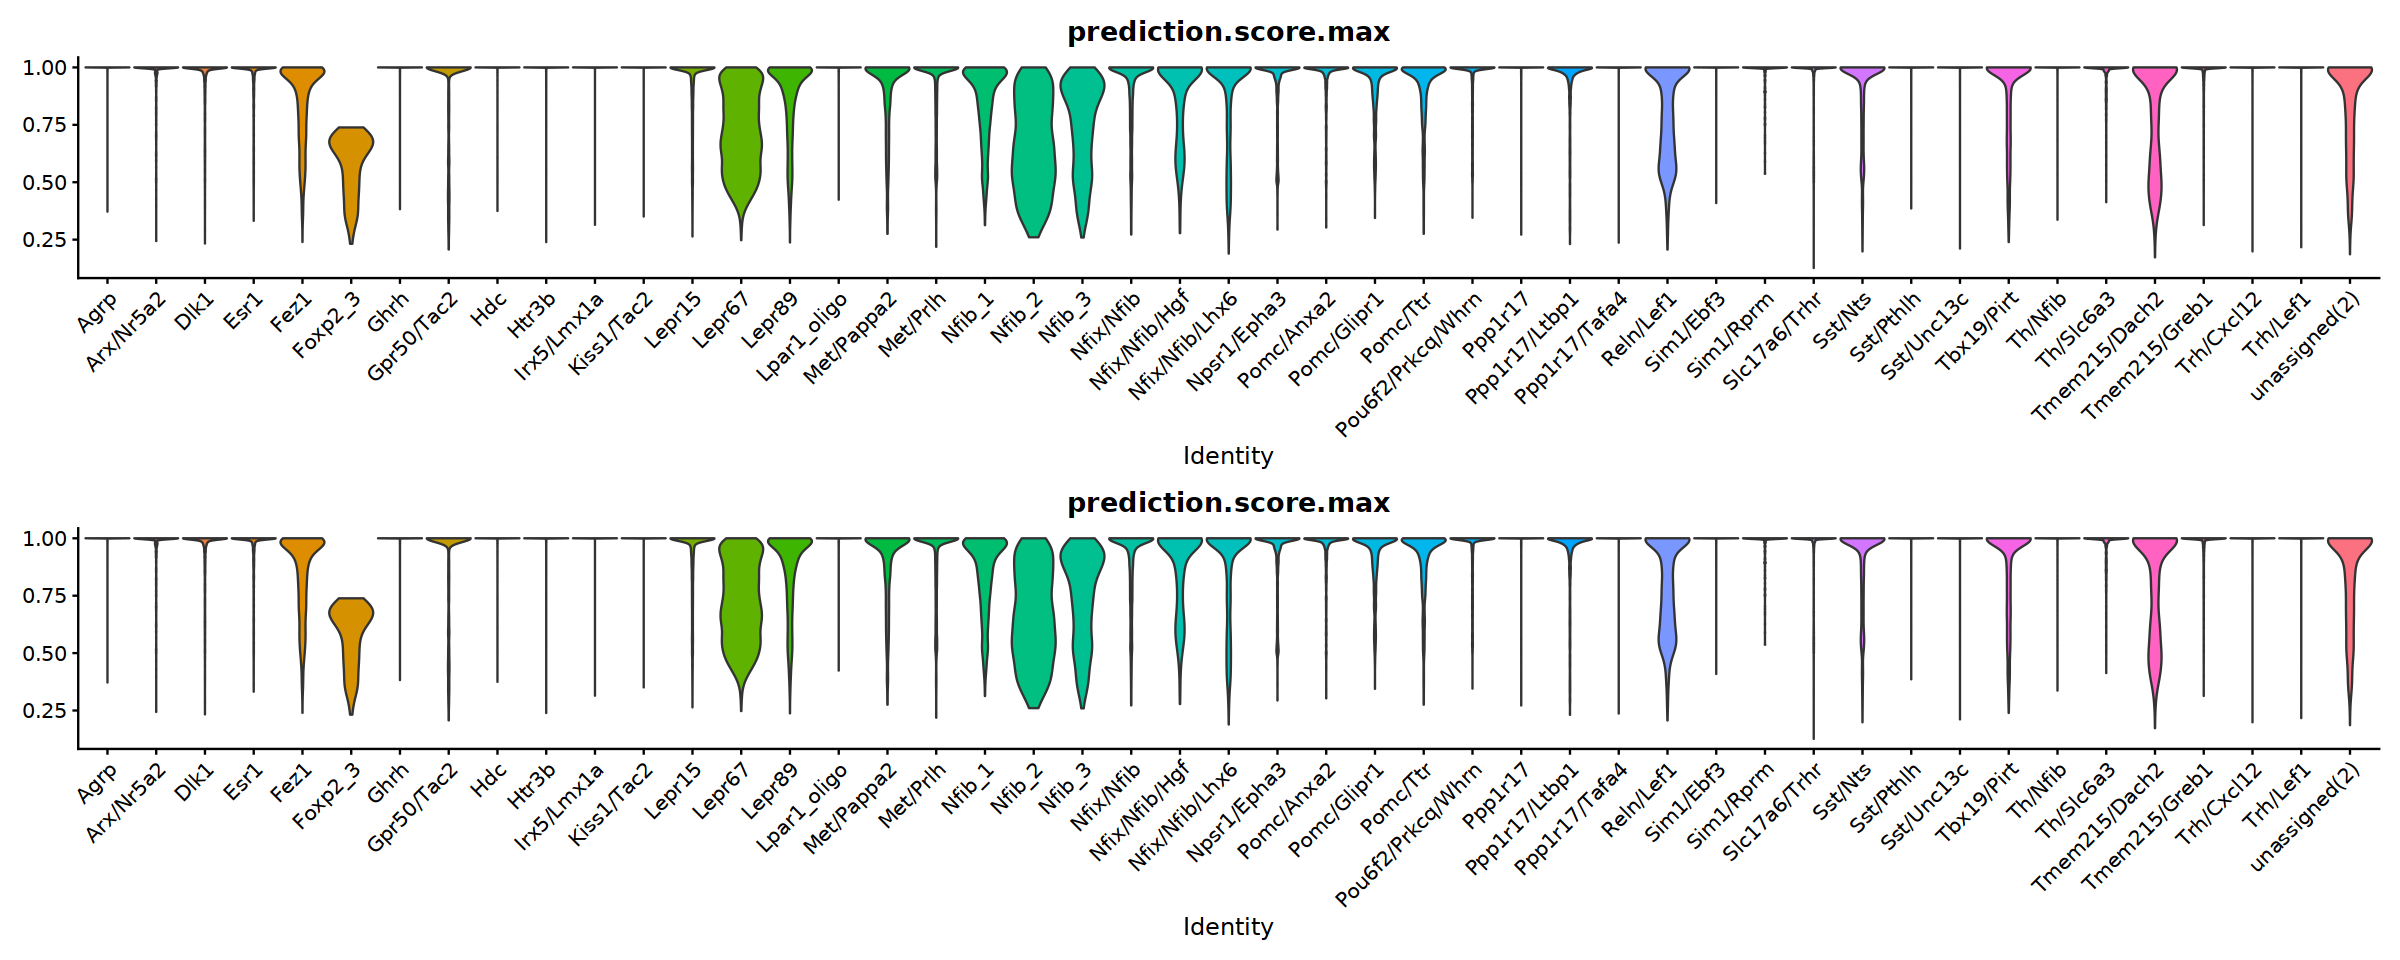

In [16]:
options(repr.plot.width=20, repr.plot.height=8)
p_vln1 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln2 = obj %>%
    subset(cells = drop_these_cells) %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_lvl1',
           pt.size=0) + NoLegend()

p_vln1 / p_vln2

In [17]:
calculate_entropy <- function(set) {
  # Ensure 'input' is a vector
  if (!is.vector(set)) {
    stop("Input must be a vector.")
  }

  # Calculate frequencies/proportions of each item
  freq <- table(set) / length(set)

  # Compute entropy
  entropy <- -sum(freq * log(freq))

  # Normalize by the logarithm of the set size
  normalized_entropy <- entropy / log(length(set))

  return(normalized_entropy)
}


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



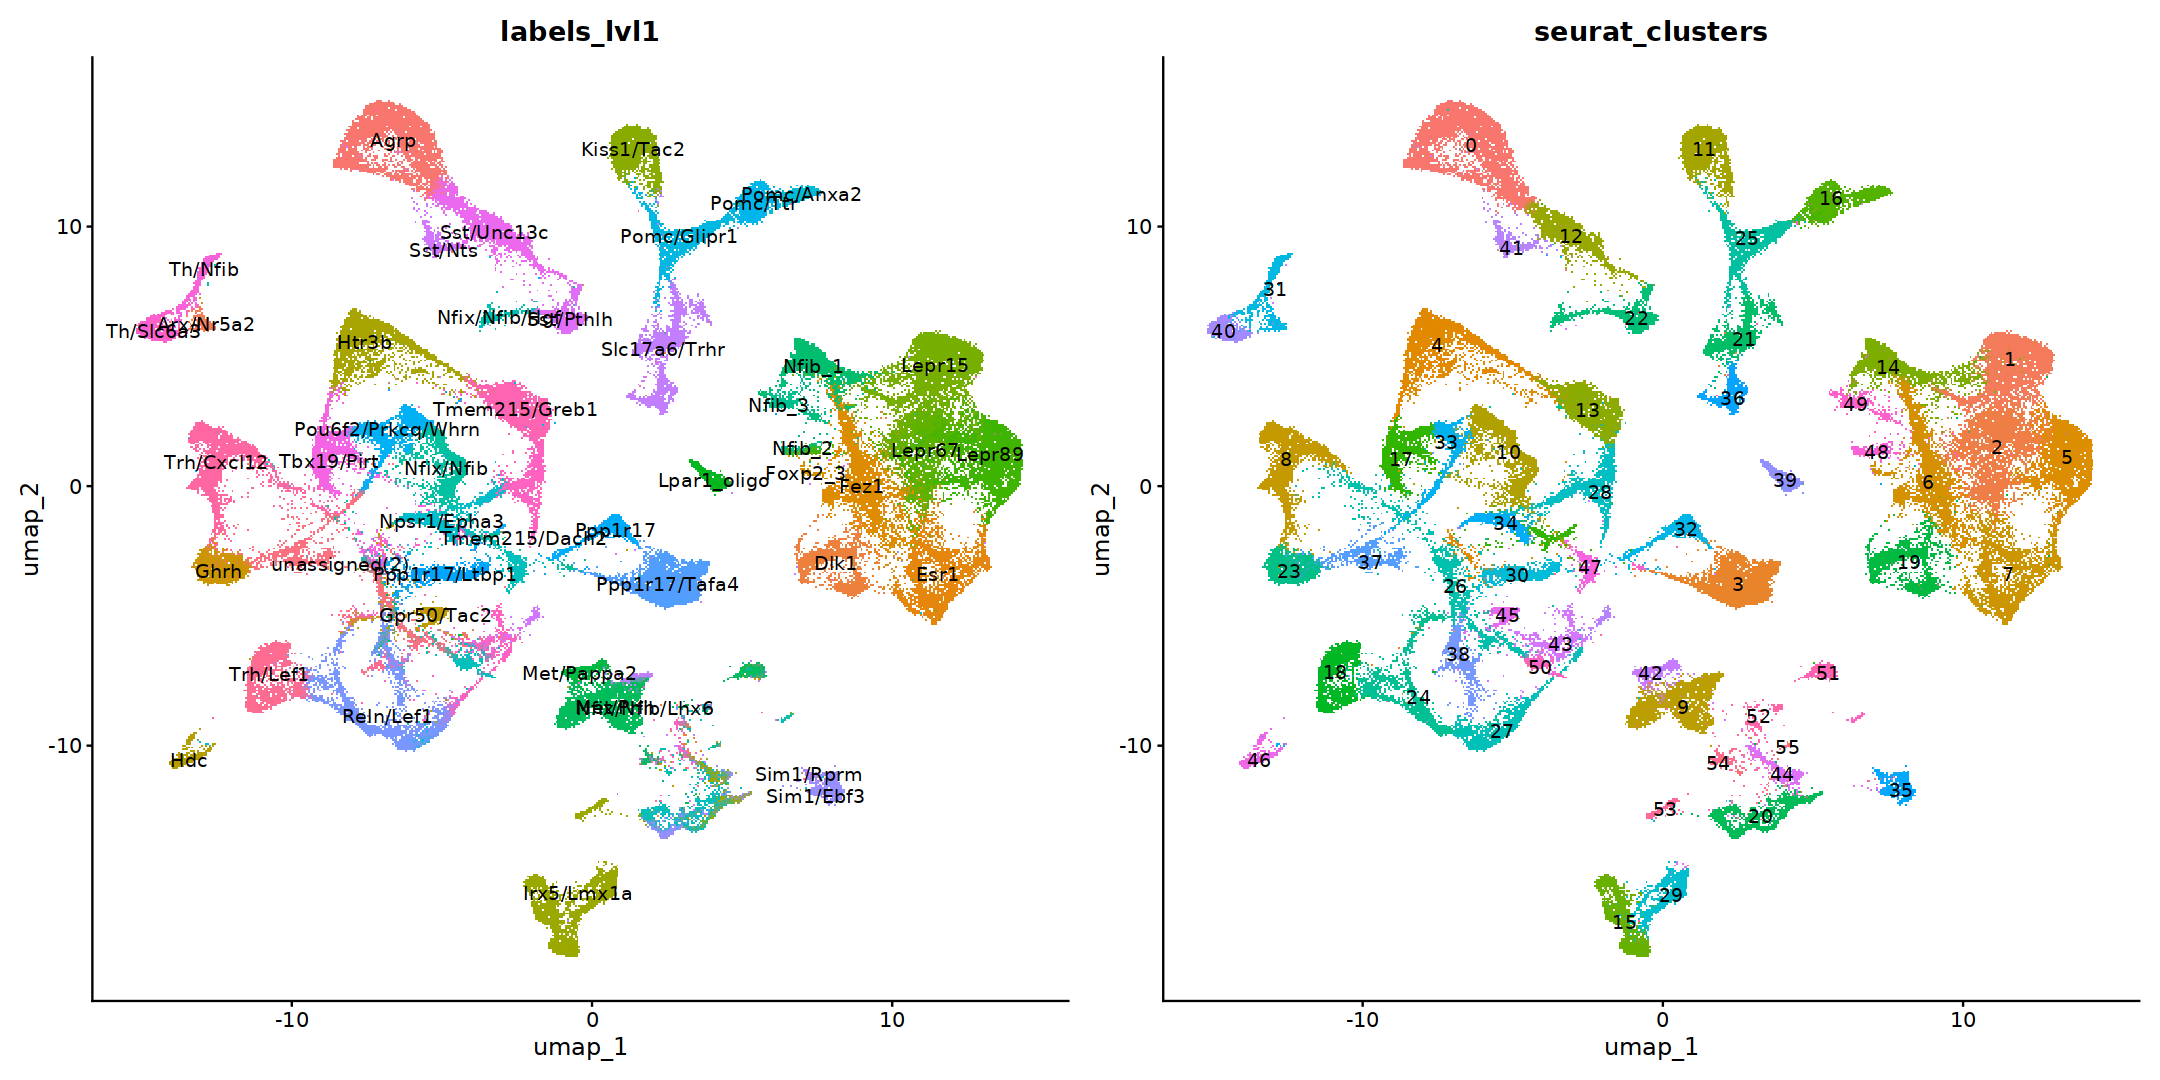

In [18]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_lvl1', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [19]:
labels_chunk = obj %>%
`[[` %>%
mutate(labels_chunk = case_when(seurat_clusters %in% c(0, 41, 12, 22) ~ 'n1',
                                seurat_clusters %in% c(11, 25, 16, 21, 36) ~ 'n2',
                                seurat_clusters %in% c(39) ~ 'n3',
                                seurat_clusters %in% c(49, 48, 14, 6, 19, 2, 1, 5, 7) ~ 'n4',
                                seurat_clusters %in% c(42, 9) ~ 'n5',
                                seurat_clusters %in% c(51, 52, 53, 54, 55, 44, 20) ~ 'drop',
                                seurat_clusters %in% c(35) ~ 'n6',
                                seurat_clusters %in% c(15, 29) ~ 'n7',
                                seurat_clusters %in% c(46) ~ 'n8',
                                seurat_clusters %in% c(40, 31) ~ 'n9',
                                TRUE ~ 'n0')) %>%
select(labels_chunk)

labels_chunk %>% qs::qsave('labels_chunk_neuron.qs')

In [45]:
labels_chunk_v01 = obj %>%
`[[` %>%
mutate(labels_chunk = case_when(seurat_clusters %in% c(0, 41, 12) ~ 'n1',
                                seurat_clusters %in% c(11, 25, 16, 21, 36) ~ 'n2',
                                seurat_clusters %in% c(39) ~ 'n3',
                                seurat_clusters %in% c(49, 48, 14, 6, 19, 2, 1, 5, 7) ~ 'n4',
                                seurat_clusters %in% c(42, 9) ~ 'n5',
                                seurat_clusters %in% c(51, 52, 54, 55, 44, 20) ~ 'n_drop',
                                seurat_clusters %in% c(35) ~ 'n6',
                                seurat_clusters %in% c(15, 29, 53) ~ 'n7',
                                seurat_clusters %in% c(46) ~ 'n8',
                                seurat_clusters %in% c(40, 31) ~ 'n9',
                                seurat_clusters %in% c(22) ~ 'n10',
                                TRUE ~ 'n0')) %>%
select(labels_chunk)

labels_chunk_v01 %>% qs::qsave('labels_chunk_neuron_v01.qs')

In [46]:
obj = obj %>% AddMetaData(labels_chunk_v01)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



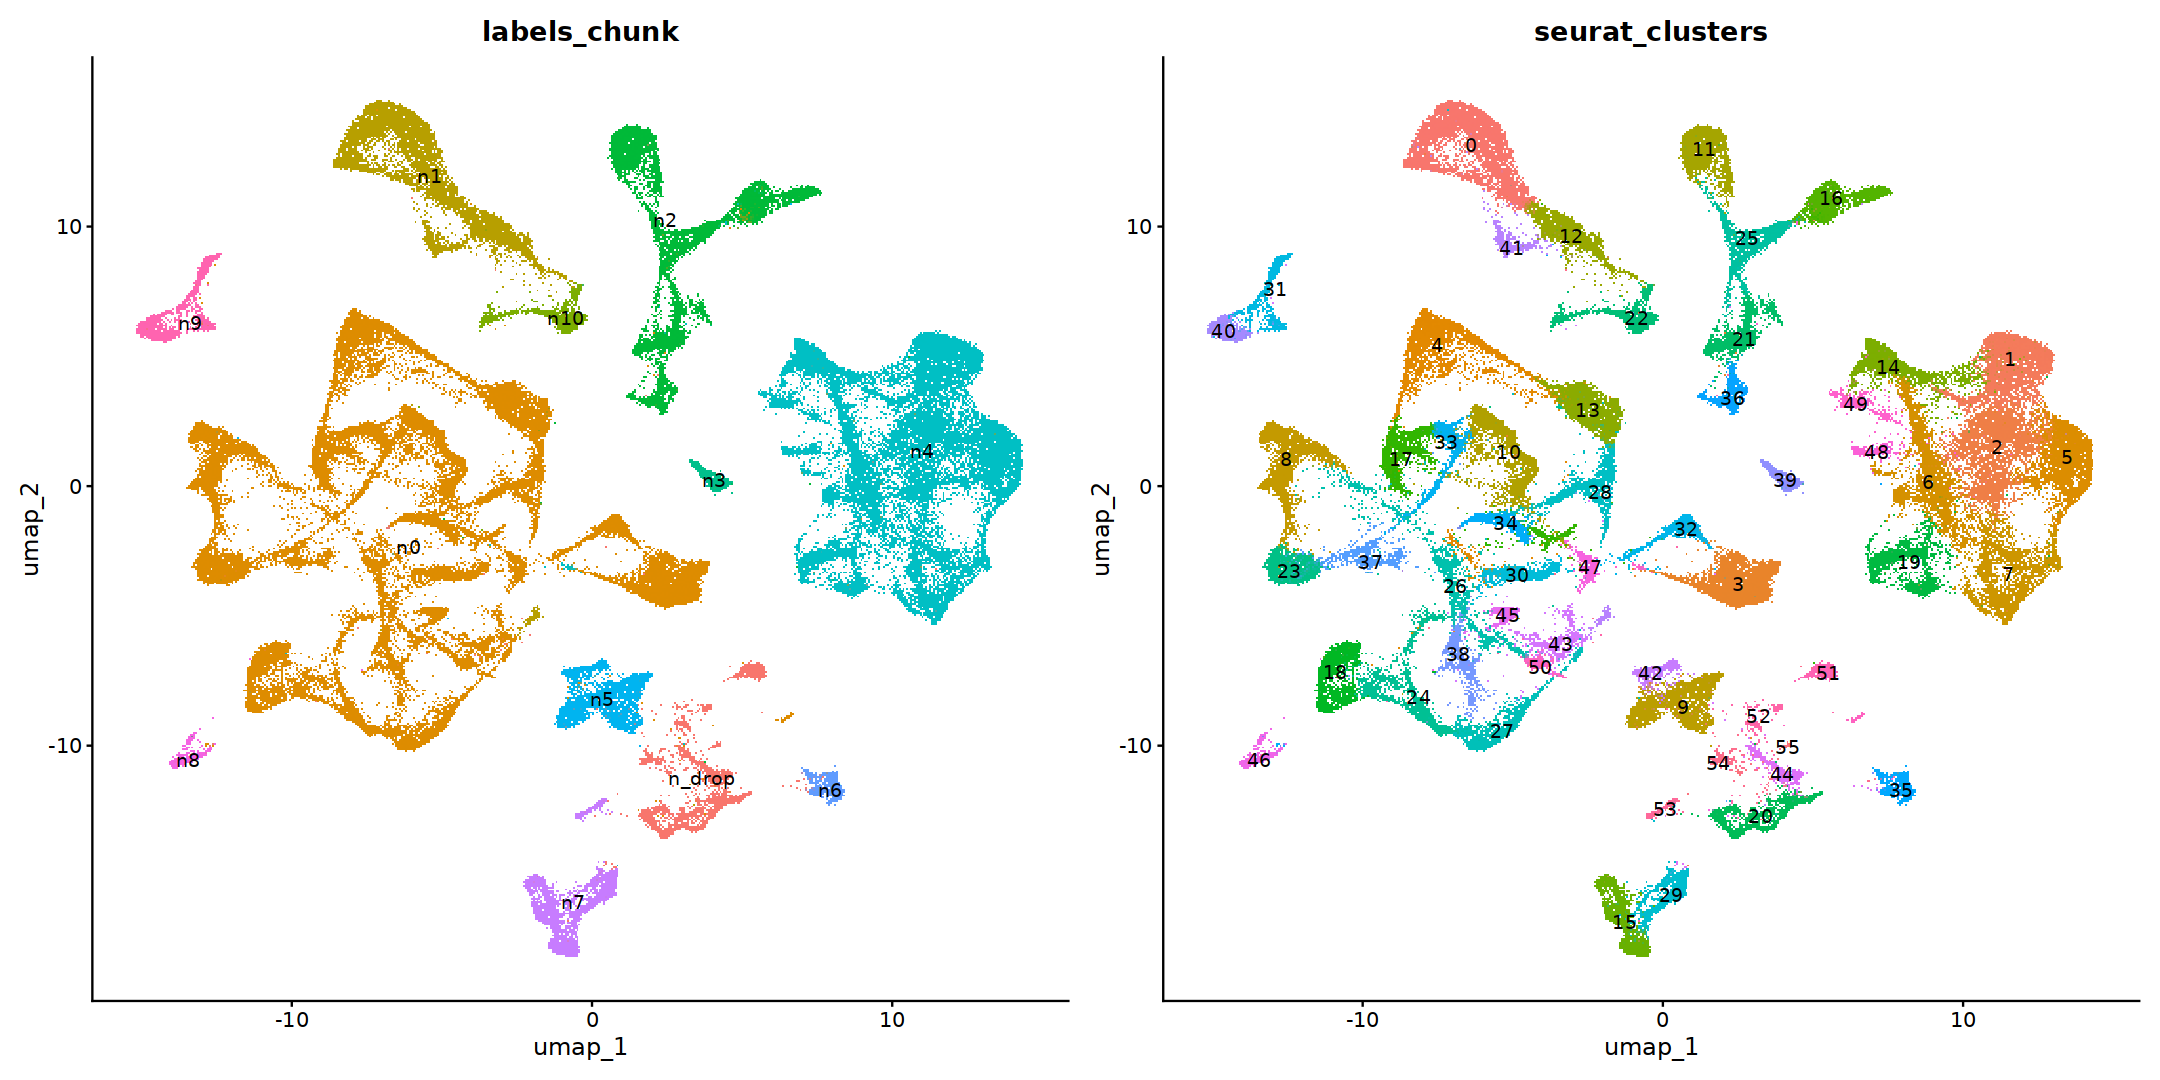

In [47]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = DimPlot(obj, reduction = "umap", group.by='labels_chunk', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



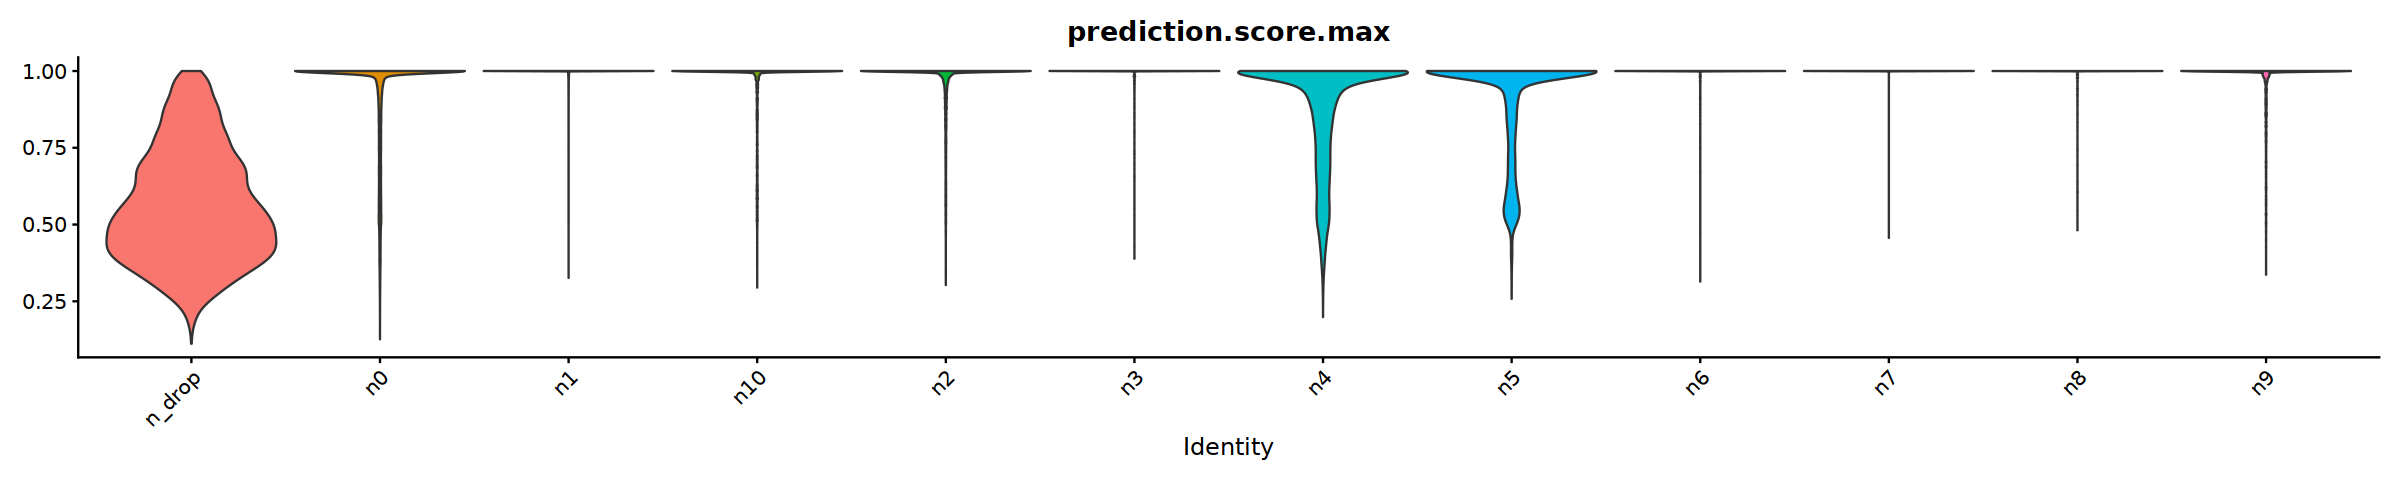

In [48]:
options(repr.plot.width=20, repr.plot.height=4)
p_vln_drop = obj %>%
    VlnPlot(features = "prediction.score.max", group.by = 'labels_chunk',
           pt.size=0) + NoLegend()

p_vln_drop

In [ ]:
options(repr.plot.width=18, repr.plot.height=9)
p_labels_lvl1 = Feat(obj, reduction = "umap", group.by='seurat+c;isters', label=T) + NoLegend()
p_seurat_clusters = DimPlot(obj, reduction = "umap", group.by='seurat_clusters', label=T) + NoLegend()
p_labels_lvl1 + p_seurat_clusters

In [34]:
obj %>% `[[` %>% colnames

[1] "orig.ident"                         "nCount_RNA"                        
 [3] "nFeature_RNA"                       "nCount_RNA_SCOP"                   
 [5] "nFeature_RNA_SCOP"                  "Index.10x_SCOP"                    
 [7] "nCount_HTO_SCOP"                    "nFeature_HTO_SCOP"                 
 [9] "Index.HTO_SCOP"                     "nCount_spliced_SCOP"               
[11] "nFeature_spliced_SCOP"              "nCount_unspliced_SCOP"             
[13] "nFeature_unspliced_SCOP"            "HTO_mcl_maxID_SCOP"                
[15] "HTO_mcl_secondID_SCOP"              "HTO_mcl_margin_SCOP"               
[17] "HTO_mcl_classification_SCOP"        "HTO_mcl_classification.global_SCOP"
[19] "hash.mcl.ID_SCOP"                   "doublet_SCOP"                      
[21] "predicted_dub_std_SCOP"             "predicted_dub_cut_SCOP"            
[23] "barcode_SCOP"                       "Index.10x"                         
[25] "barcode"                            "strain"                            
[27] "treatment"                          "time"                              
[29] "collection_date"                    "isolation_date"                    
[31] "batch"                              "integrated_snn_res.0.5"            
[33] "seurat_clusters"                    "class"                             
[35] "integrated_snn_res.0.8"             "labels_lvl1_mg"                    
[37] "labels_lvl1"                        "prediction.score.max"              
[39] "labels_lvl2"                        "labels_chunk"

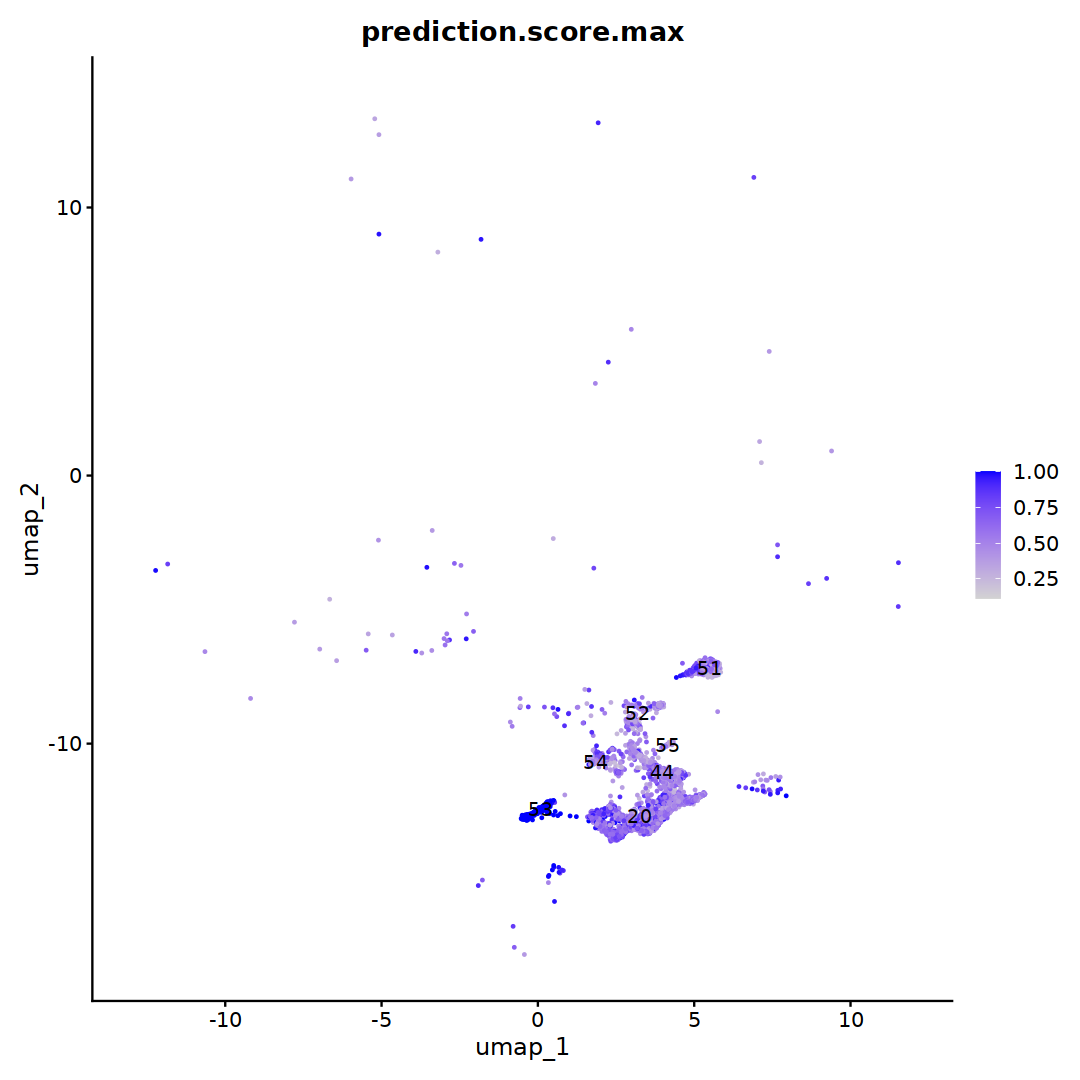

In [36]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_chunk == 'drop')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

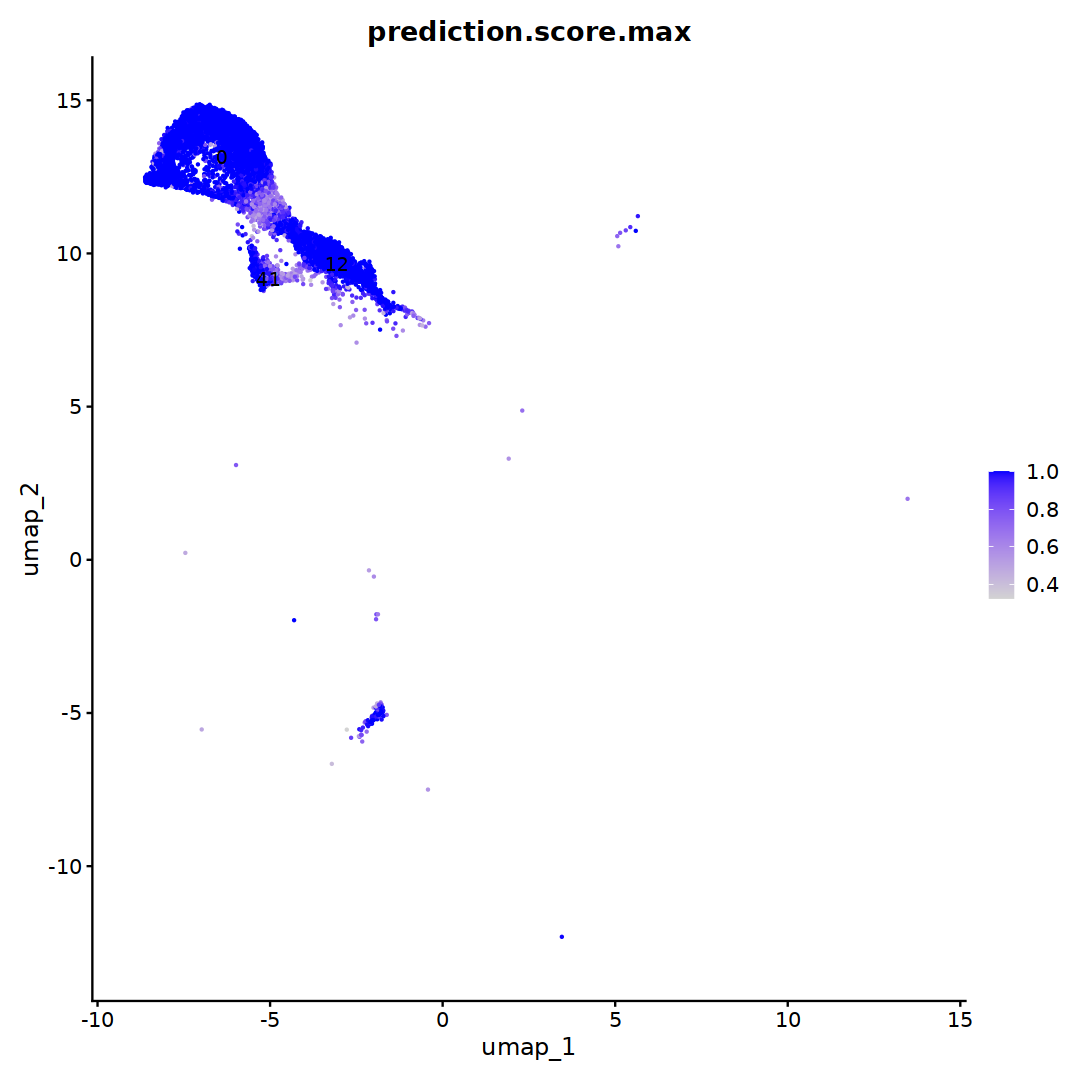

In [37]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_chunk == 'n1')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

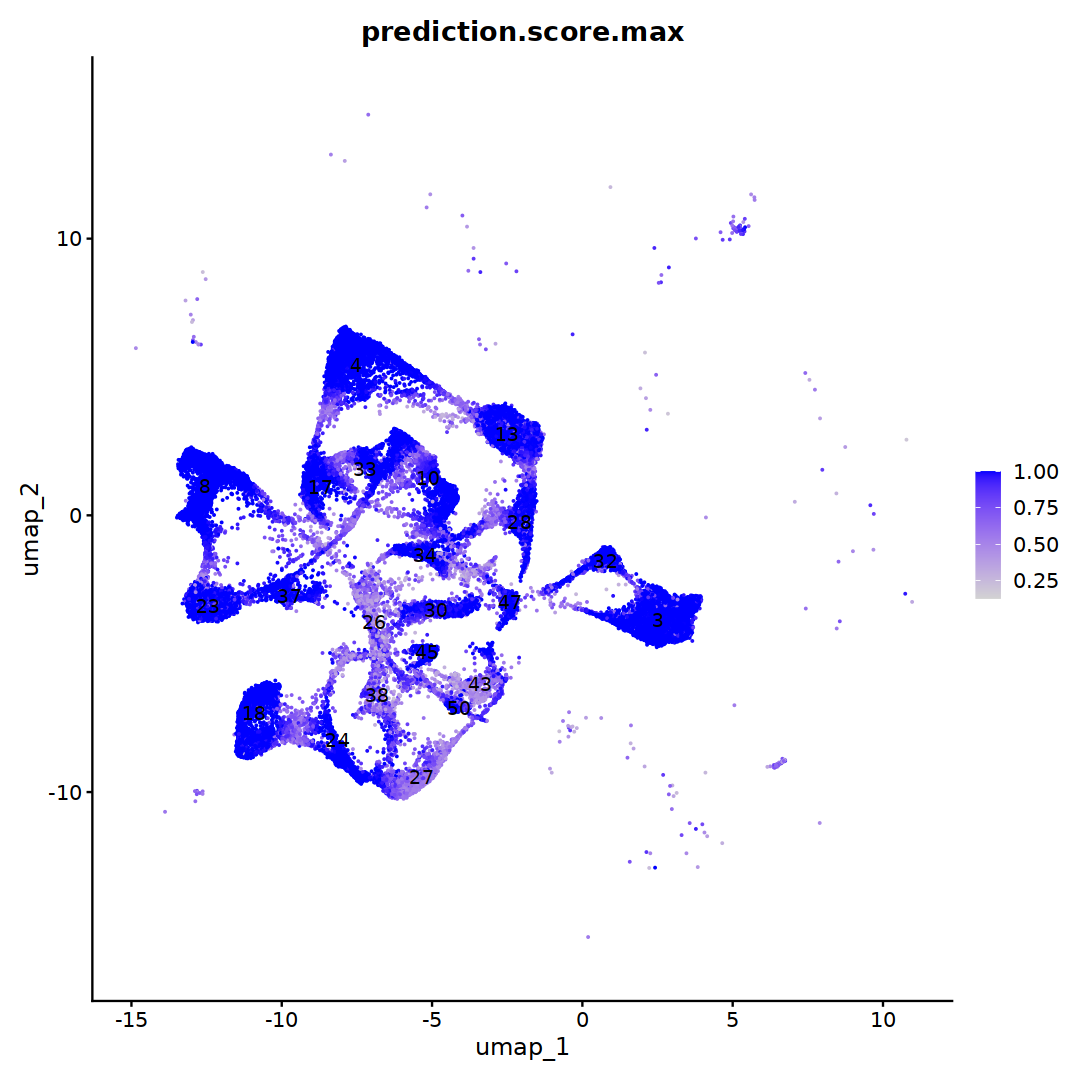

In [39]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_chunk == 'n0')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

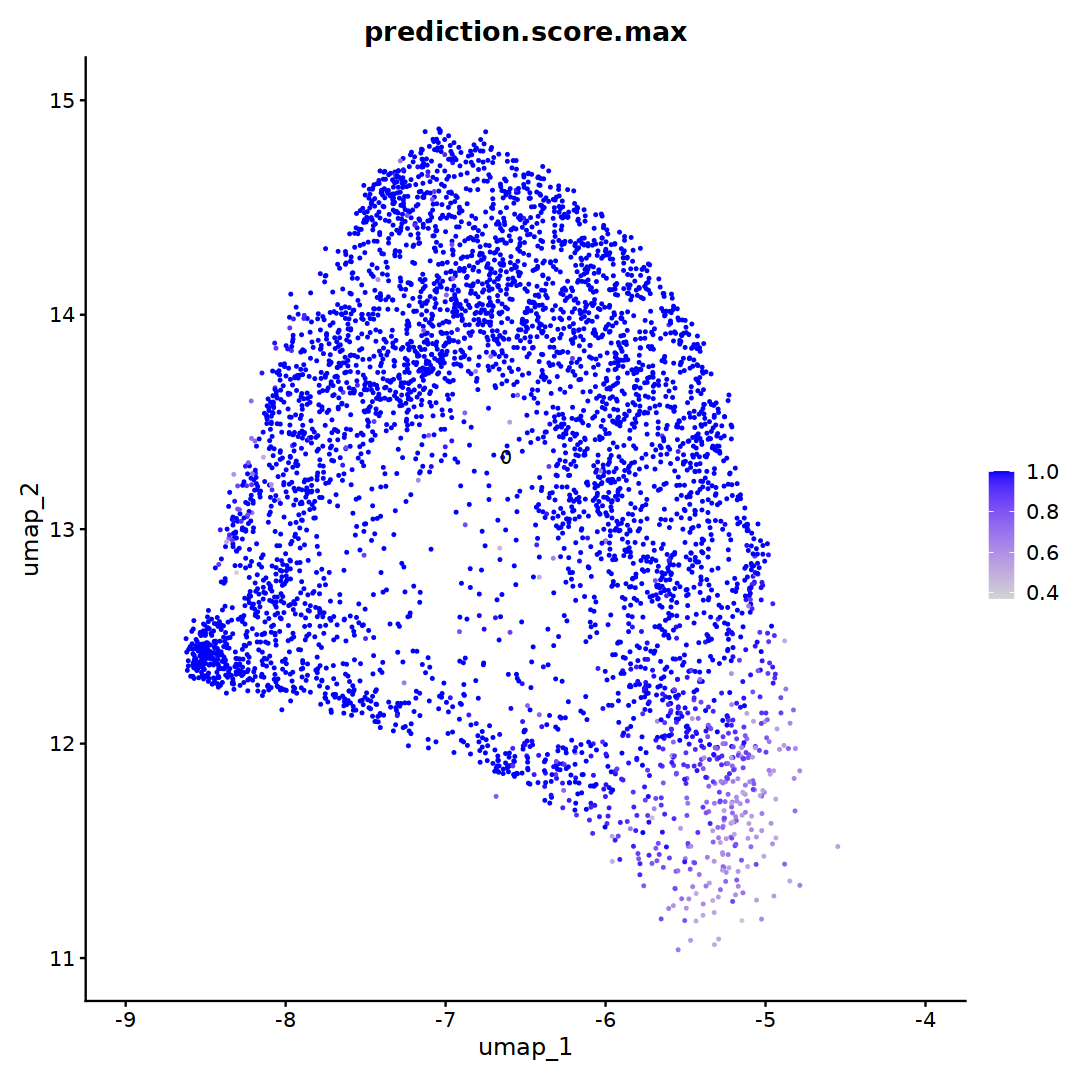

In [38]:
options(repr.plot.width=9, repr.plot.height=9)
obj_s = obj %>% subset(subset = labels_lvl1 == 'Agrp')
Idents(obj_s) = 'seurat_clusters'
FeaturePlot(obj_s, features = 'prediction.score.max', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



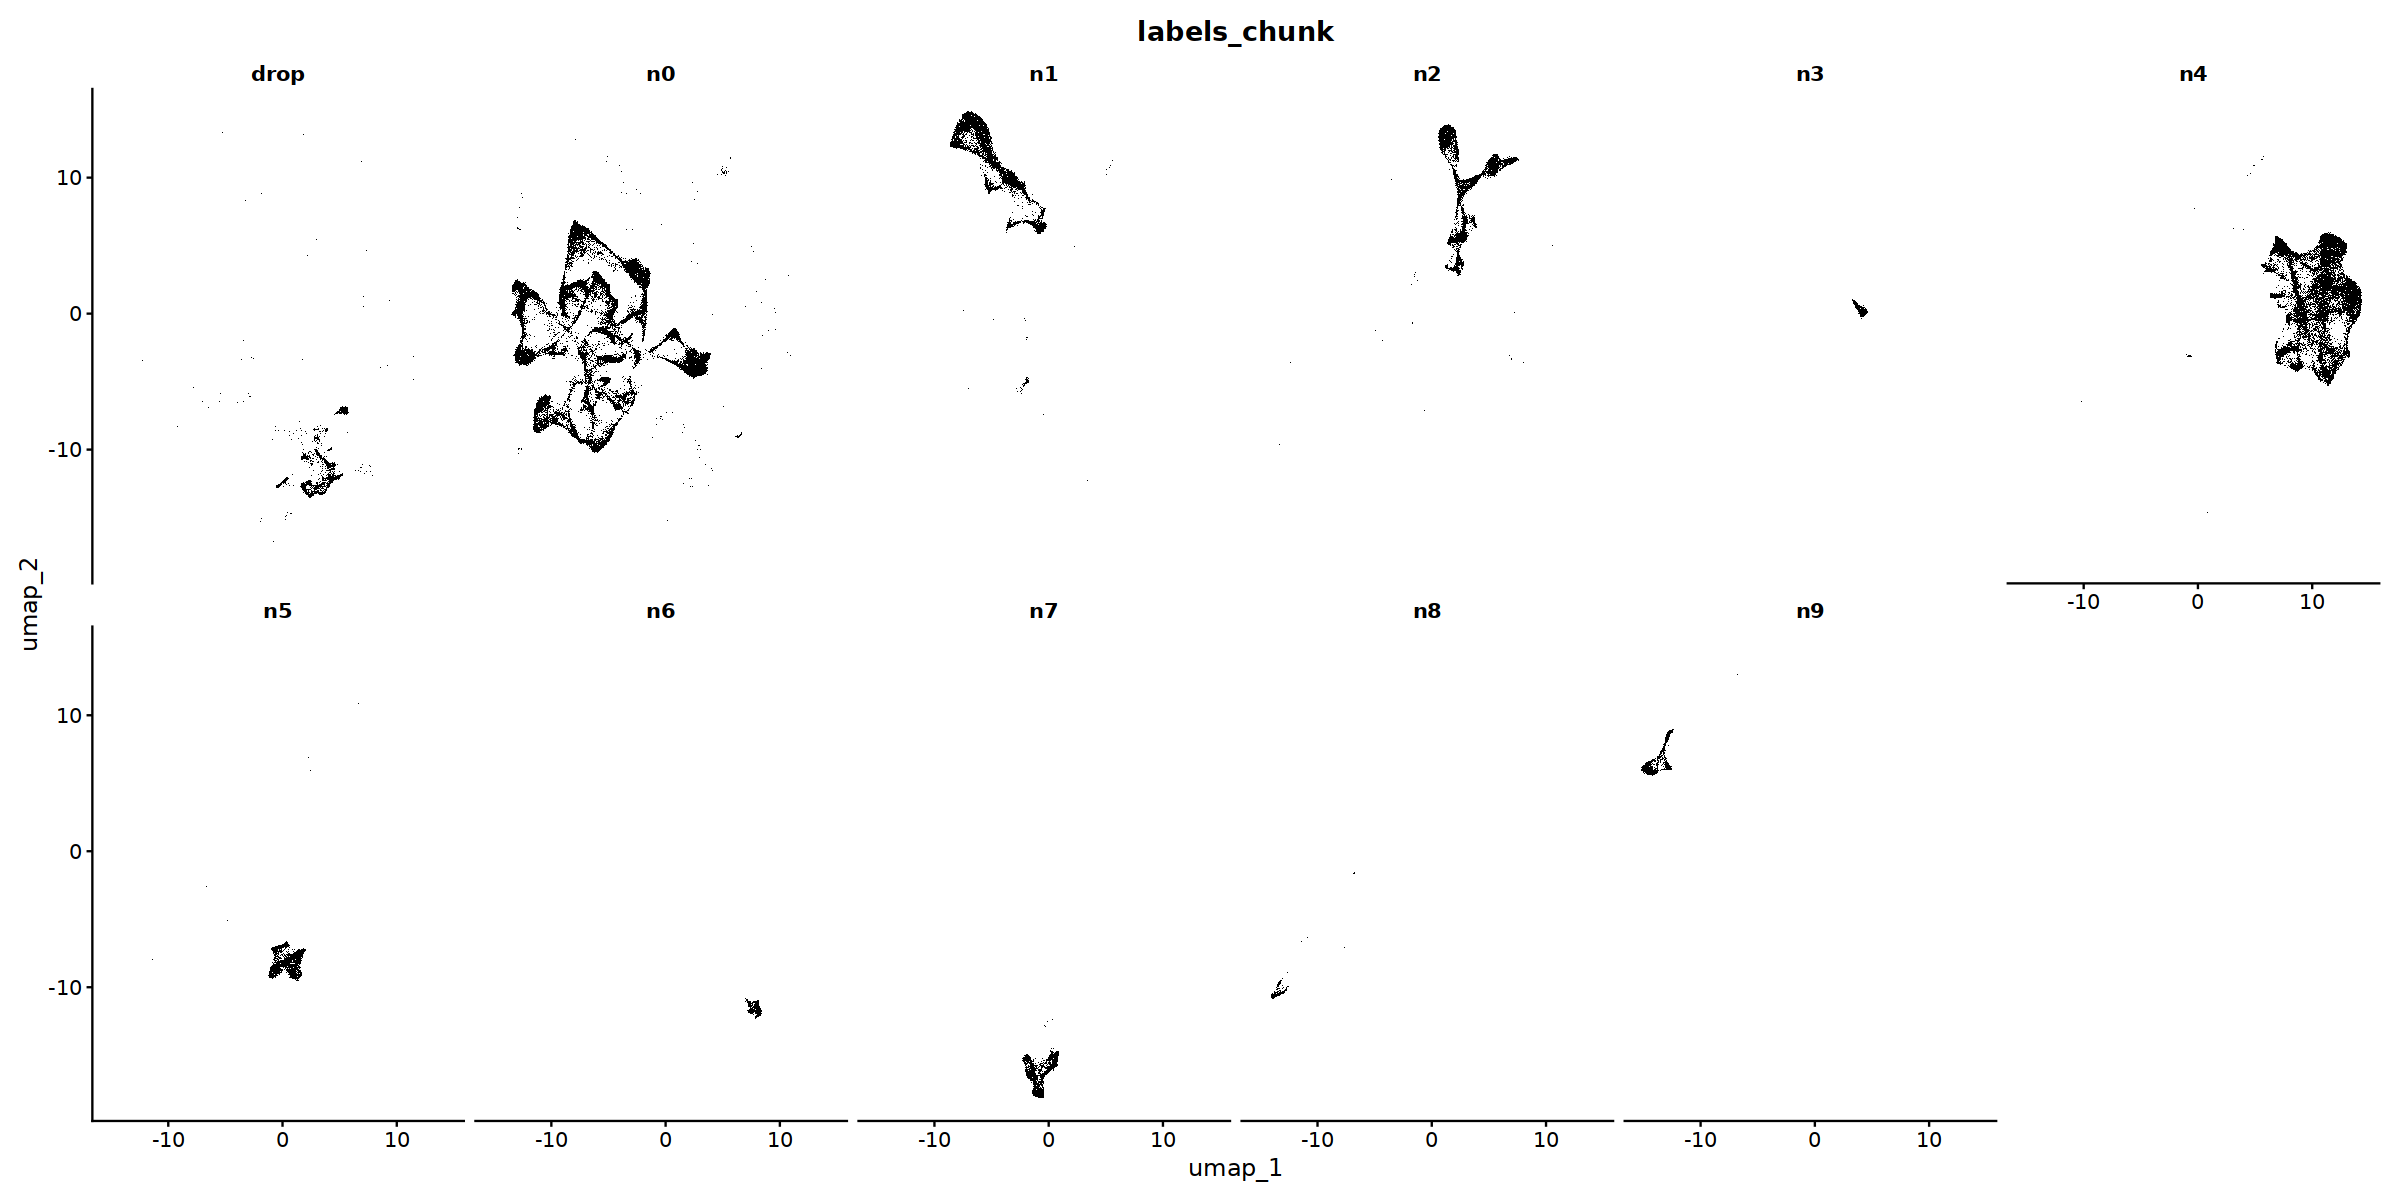

In [22]:
options(repr.plot.width=20, repr.plot.height=10)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_chunk', label=F, split.by='labels_chunk', ncol=6) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



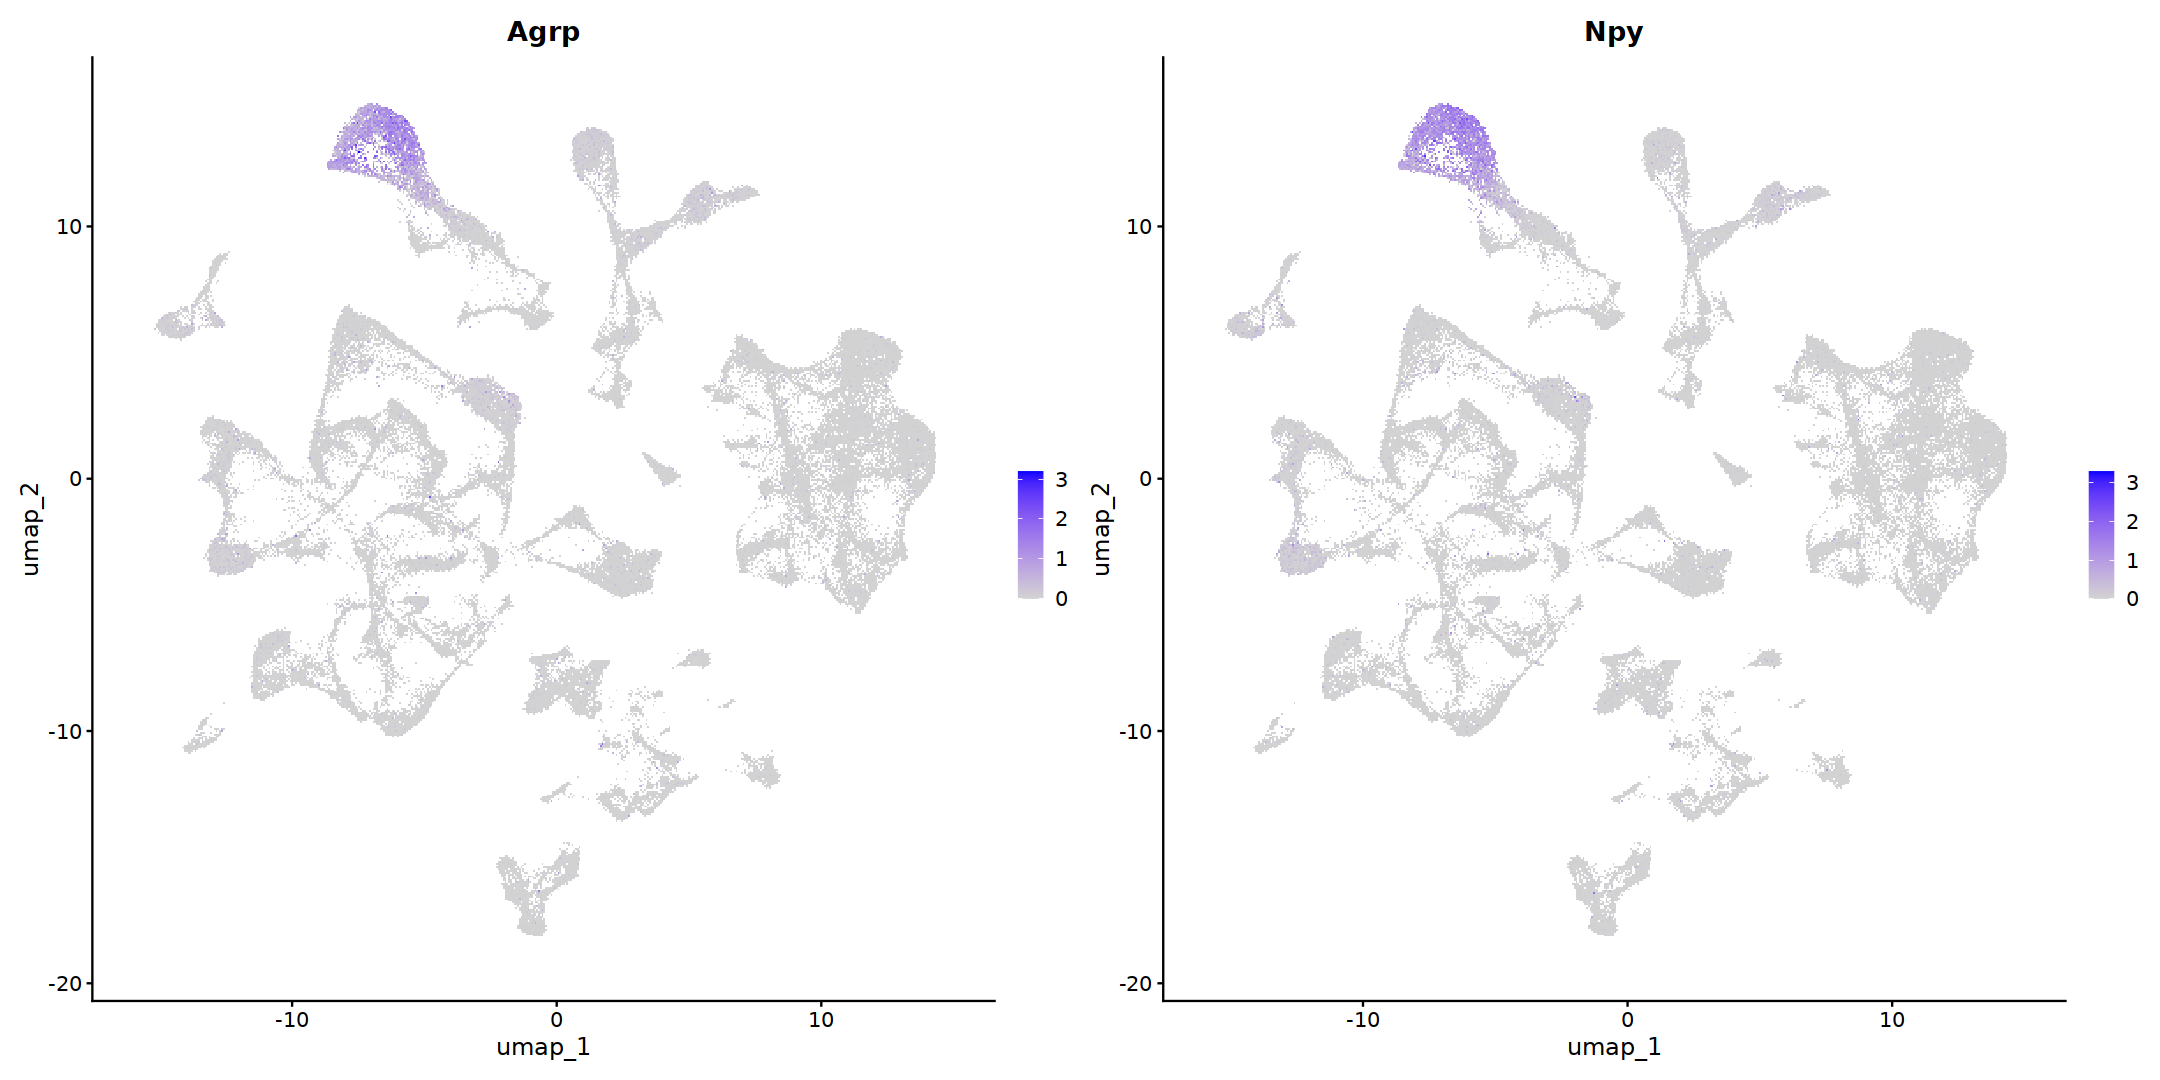

In [23]:
DefaultAssay(obj) = 'integrated'
options(repr.plot.width=18, repr.plot.height=9)
obj %>% FeaturePlot(features=c('Agrp', 'Npy'),slot = 'data',min.cutoff = 0, order =TRUE)

In [24]:
obj %>%
`[[` %>%
group_by(seurat_clusters) %>%
mutate(entropy = calculate_entropy(labels_lvl1)) %>%
select(seurat_clusters, entropy) %>%
distinct %>%
arrange(desc(entropy))

seurat_clusters,entropy
<fct>,<dbl>
54,0.288992471
52,0.268739537
55,0.250207073
26,0.248078502
48,0.233195648
44,0.232357179
43,0.204521612
51,0.192389156
49,0.168446272


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



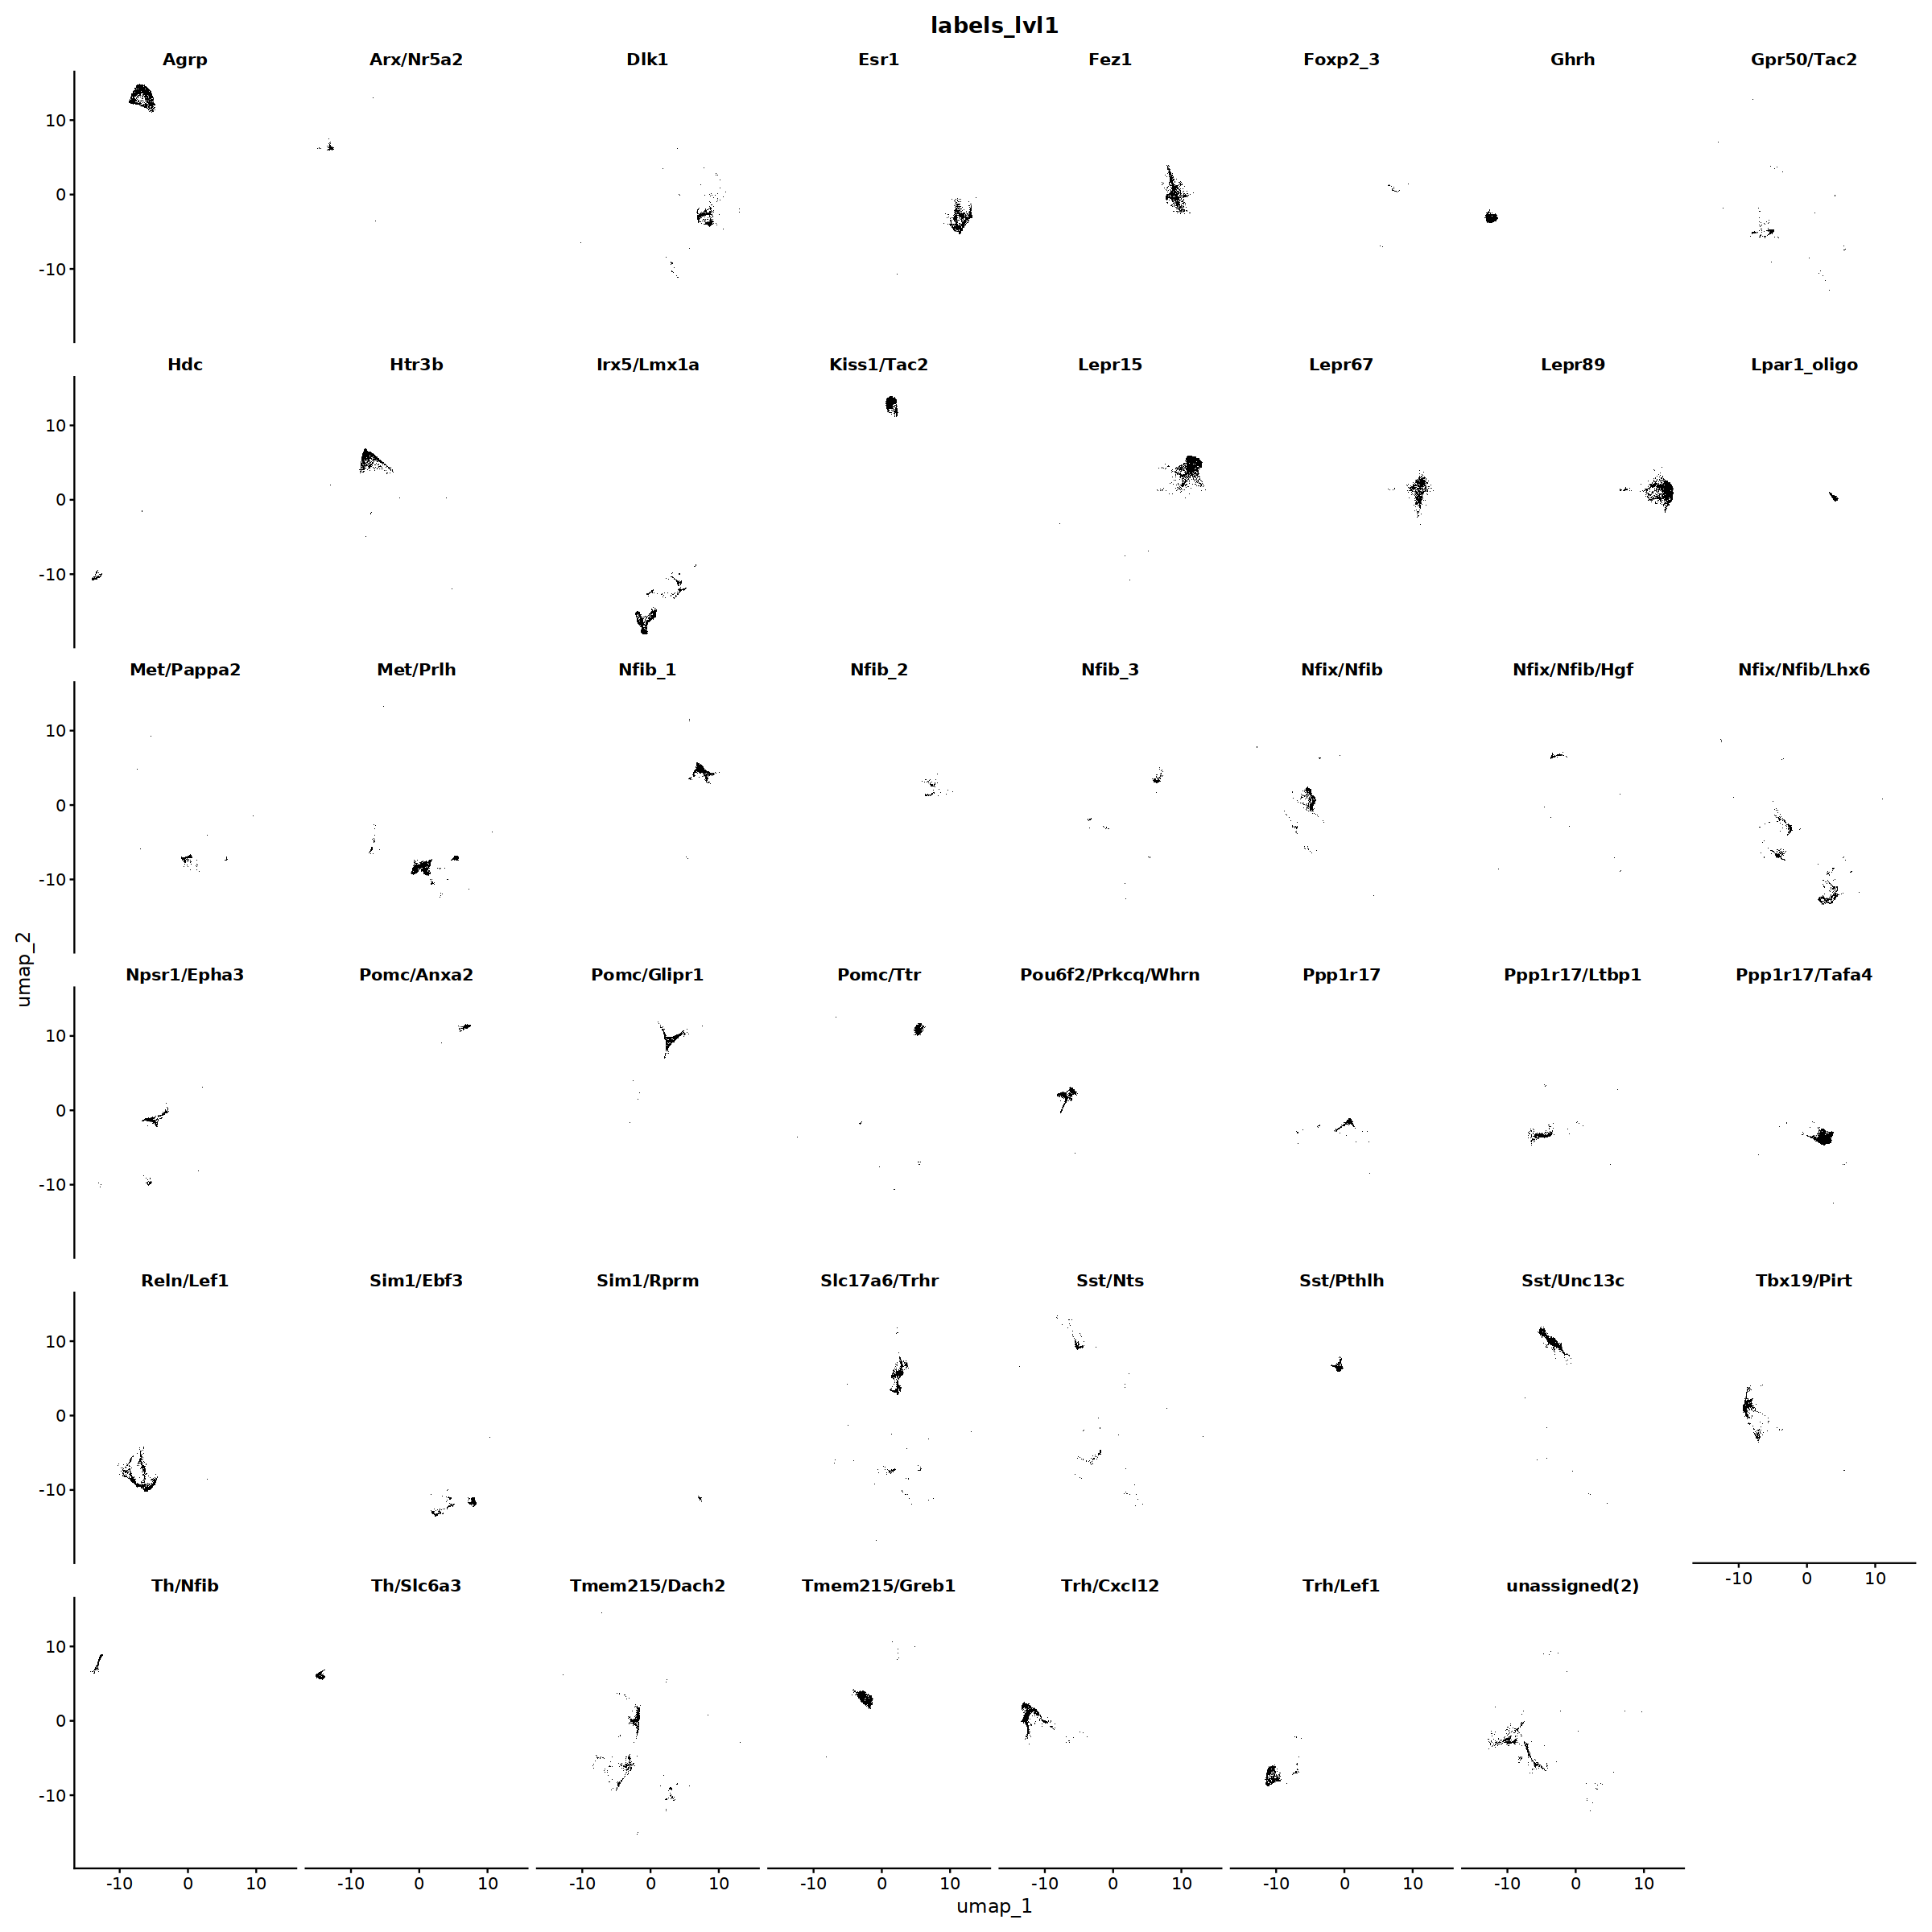

In [25]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", dims=c(1,2), cols=rep('black', 58), group.by='labels_lvl1', label=F, split.by='labels_lvl1', ncol=8) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



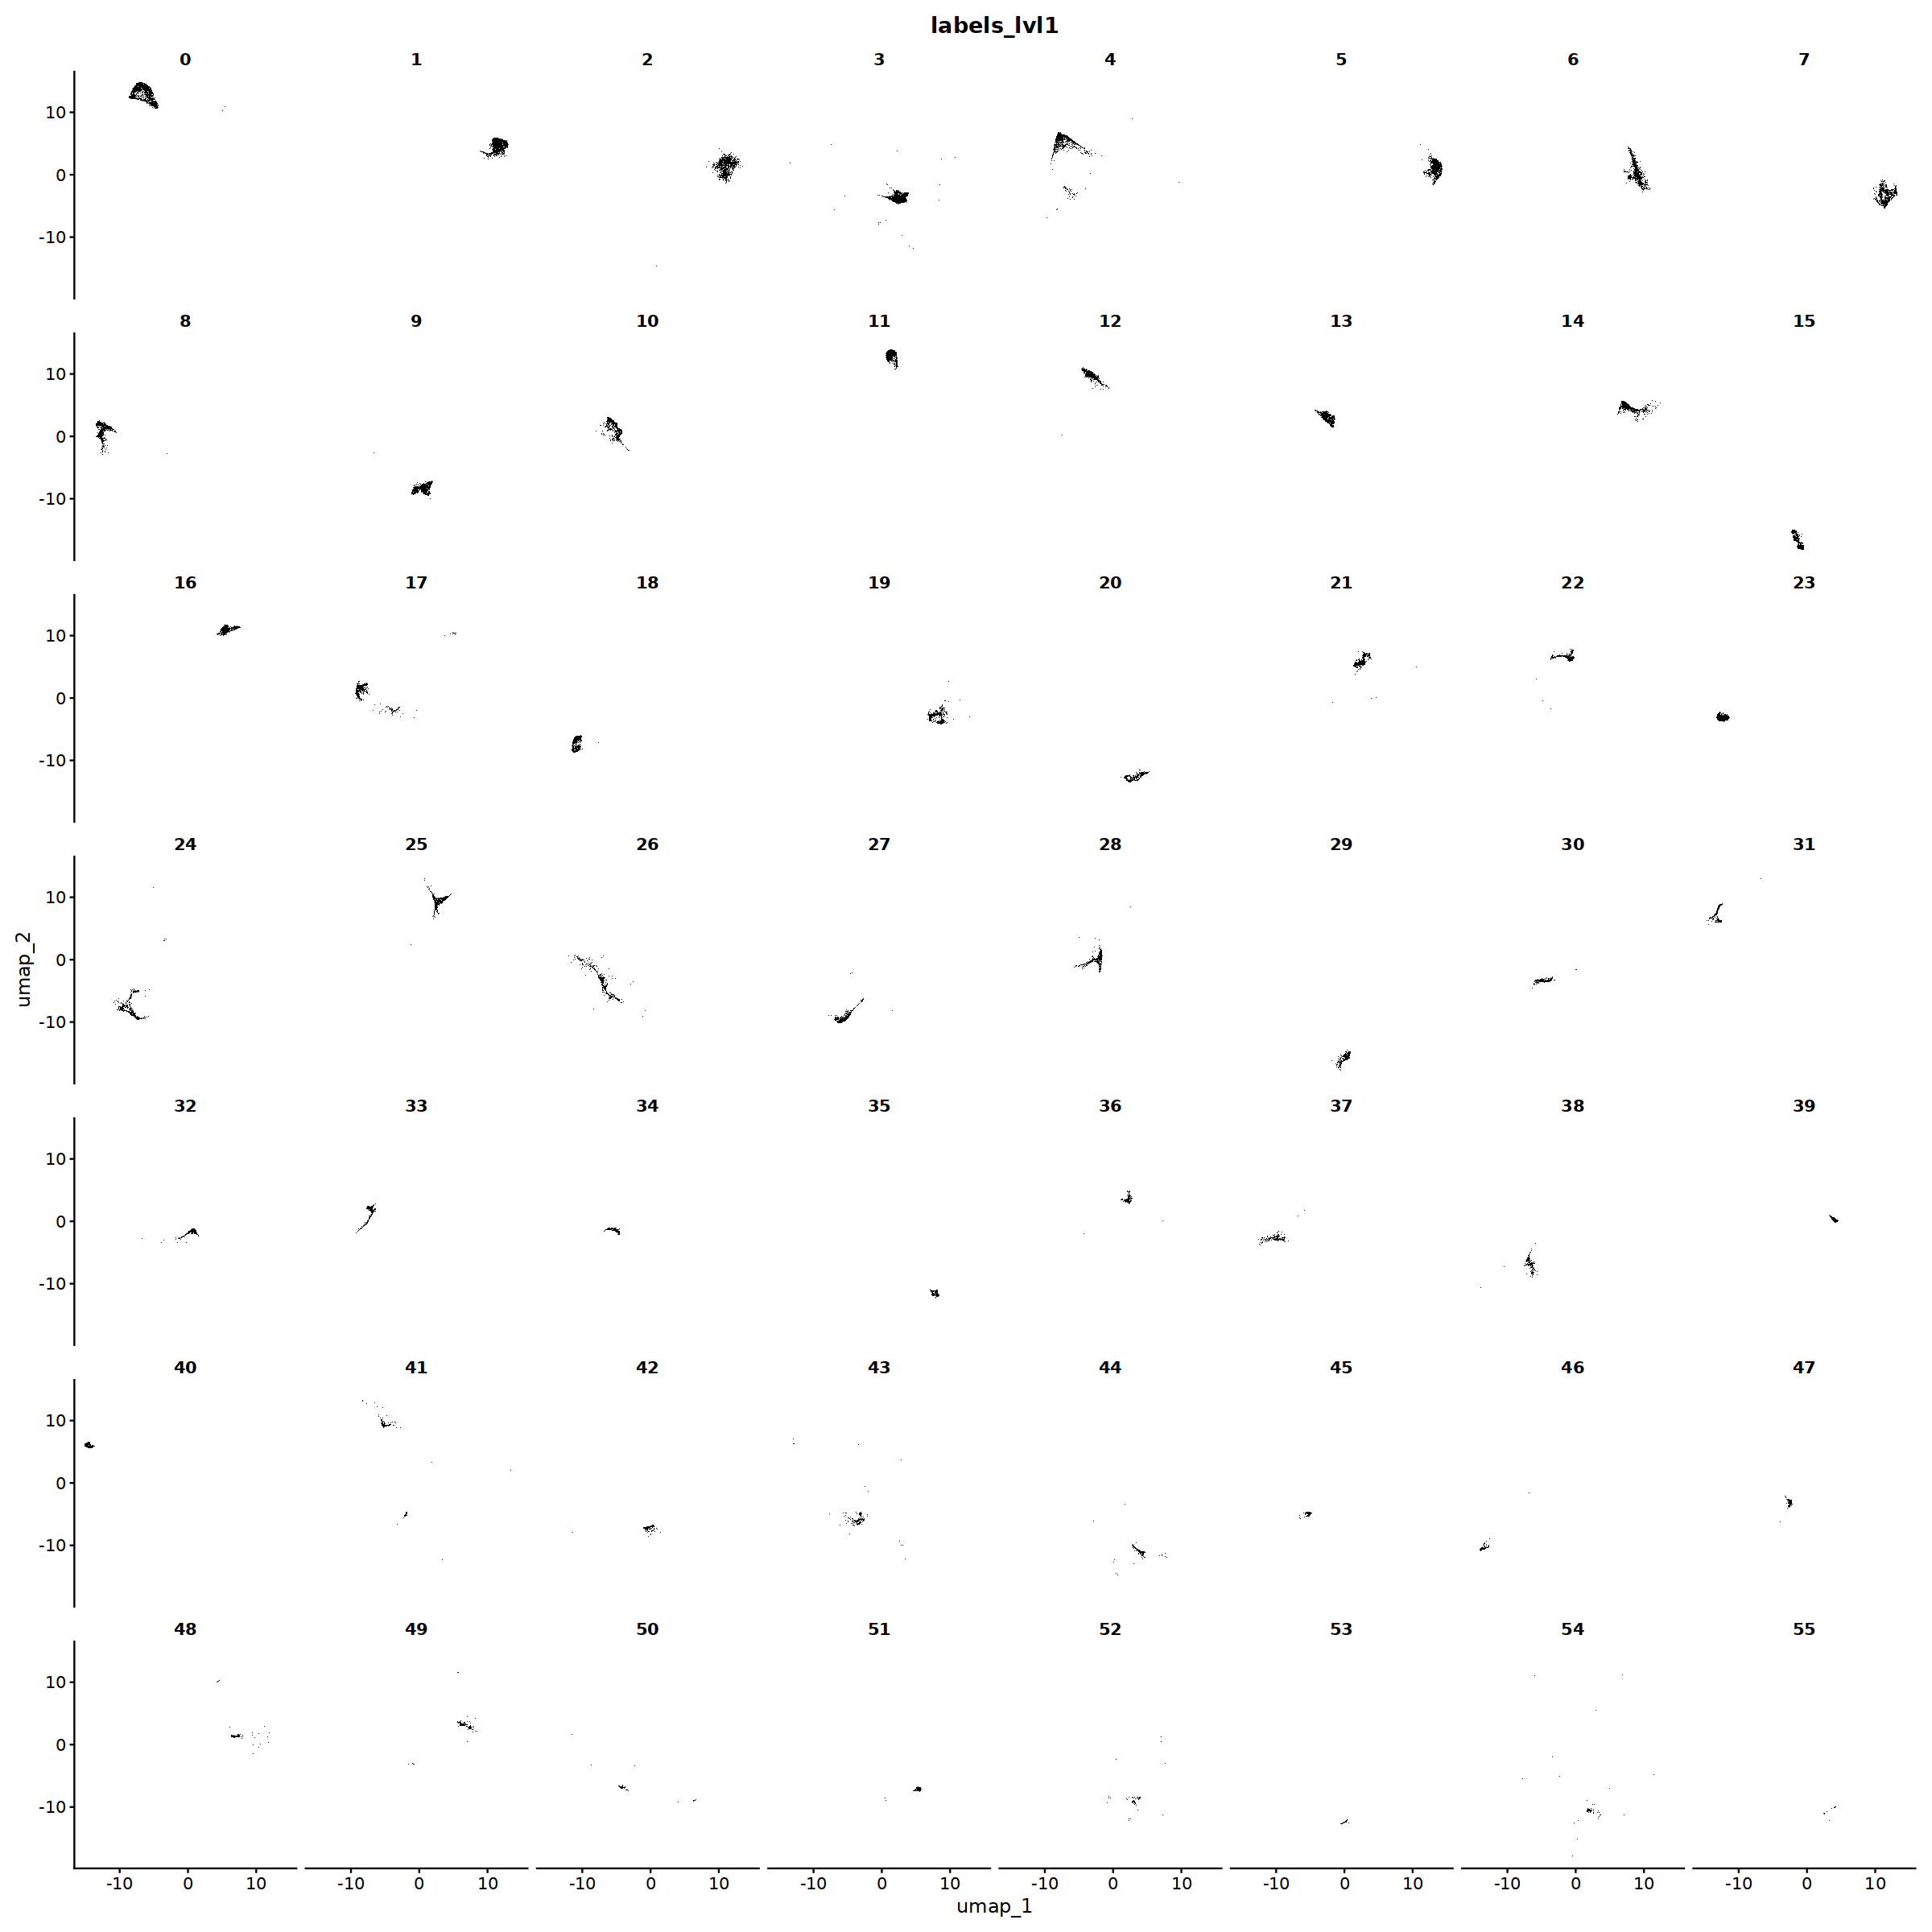

In [26]:
options(repr.plot.width=20, repr.plot.height=20)
DimPlot(obj, reduction = "umap", cols=rep('black', 58), dims=c(1,2), group.by='labels_lvl1', label=F, split.by='seurat_clusters', ncol=8) + NoLegend()

In [27]:
freq_df = create_freq_df_per_cluster(obj, label_col='labels_lvl1')
freq_df %>% head

seurat_clusters,Agrp,Arx/Nr5a2,Dlk1,Esr1,Fez1,Foxp2_3,Ghrh,Gpr50/Tac2,Hdc,⋯,Sst/Pthlh,Sst/Unc13c,Tbx19/Pirt,Th/Nfib,Th/Slc6a3,Tmem215/Dach2,Tmem215/Greb1,Trh/Cxcl12,Trh/Lef1,unassigned(2)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.8912363,0.0000000000,0.00000000,0.0000000000,0.0000000000,0,0,0.0000000000,0.000000000,⋯,0,0.1028951487,0.00000000,0,0,0.000000000,0.00000000,0.000000000,0.000000000,0.0000000000
1,0.0000000,0.0000000000,0.00000000,0.0000000000,0.0000000000,0,0,0.0000000000,0.000000000,⋯,0,0.0000000000,0.00000000,0,0,0.000000000,0.00000000,0.000000000,0.000000000,0.0000000000
2,0.0000000,0.0000000000,0.00307474,0.0092242195,0.0669347209,0,0,0.0000000000,0.000000000,⋯,0,0.0000000000,0.00000000,0,0,0.000000000,0.00000000,0.000000000,0.000000000,0.0002365184
3,0.0000000,0.0000000000,0.00195599,0.0002444988,0.0002444988,0,0,0.0009779951,0.000000000,⋯,0,0.0004889976,0.00000000,0,0,0.001222494,0.00000000,0.000000000,0.000000000,0.0004889976
4,0.0000000,0.0002630887,0.00000000,0.0000000000,0.0002630887,0,0,0.0081557485,0.000789266,⋯,0,0.0002630887,0.04235727,0,0,0.009208103,0.01315443,0.006314128,0.006314128,0.0002630887
5,0.0000000,0.0000000000,0.00000000,0.0061383929,0.0000000000,0,0,0.0000000000,0.000000000,⋯,0,0.0002790179,0.00000000,0,0,0.000000000,0.00000000,0.000000000,0.000000000,0.0000000000
